In [6]:
from eos import mixtures_eos, cms_eos, scvh_eos
from misc import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tick
from matplotlib.patches import Rectangle
from tqdm import tqdm
import pandas as pd
from scipy.interpolate import interp1d
erg_to_kbbar = mixtures_eos.erg_to_kbbar

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=25)
plt.rc('axes', linewidth=1.5)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25, direction='in')
plt.rc('ytick', labelsize=25, direction='in')

plt.rc('xtick.major',size=15,pad=8)
plt.rc('xtick.minor',size=7,pad=8)
plt.rc('ytick.major',size=15)
plt.rc('ytick.minor',size=7)

plt.rcParams['axes.grid'] = True

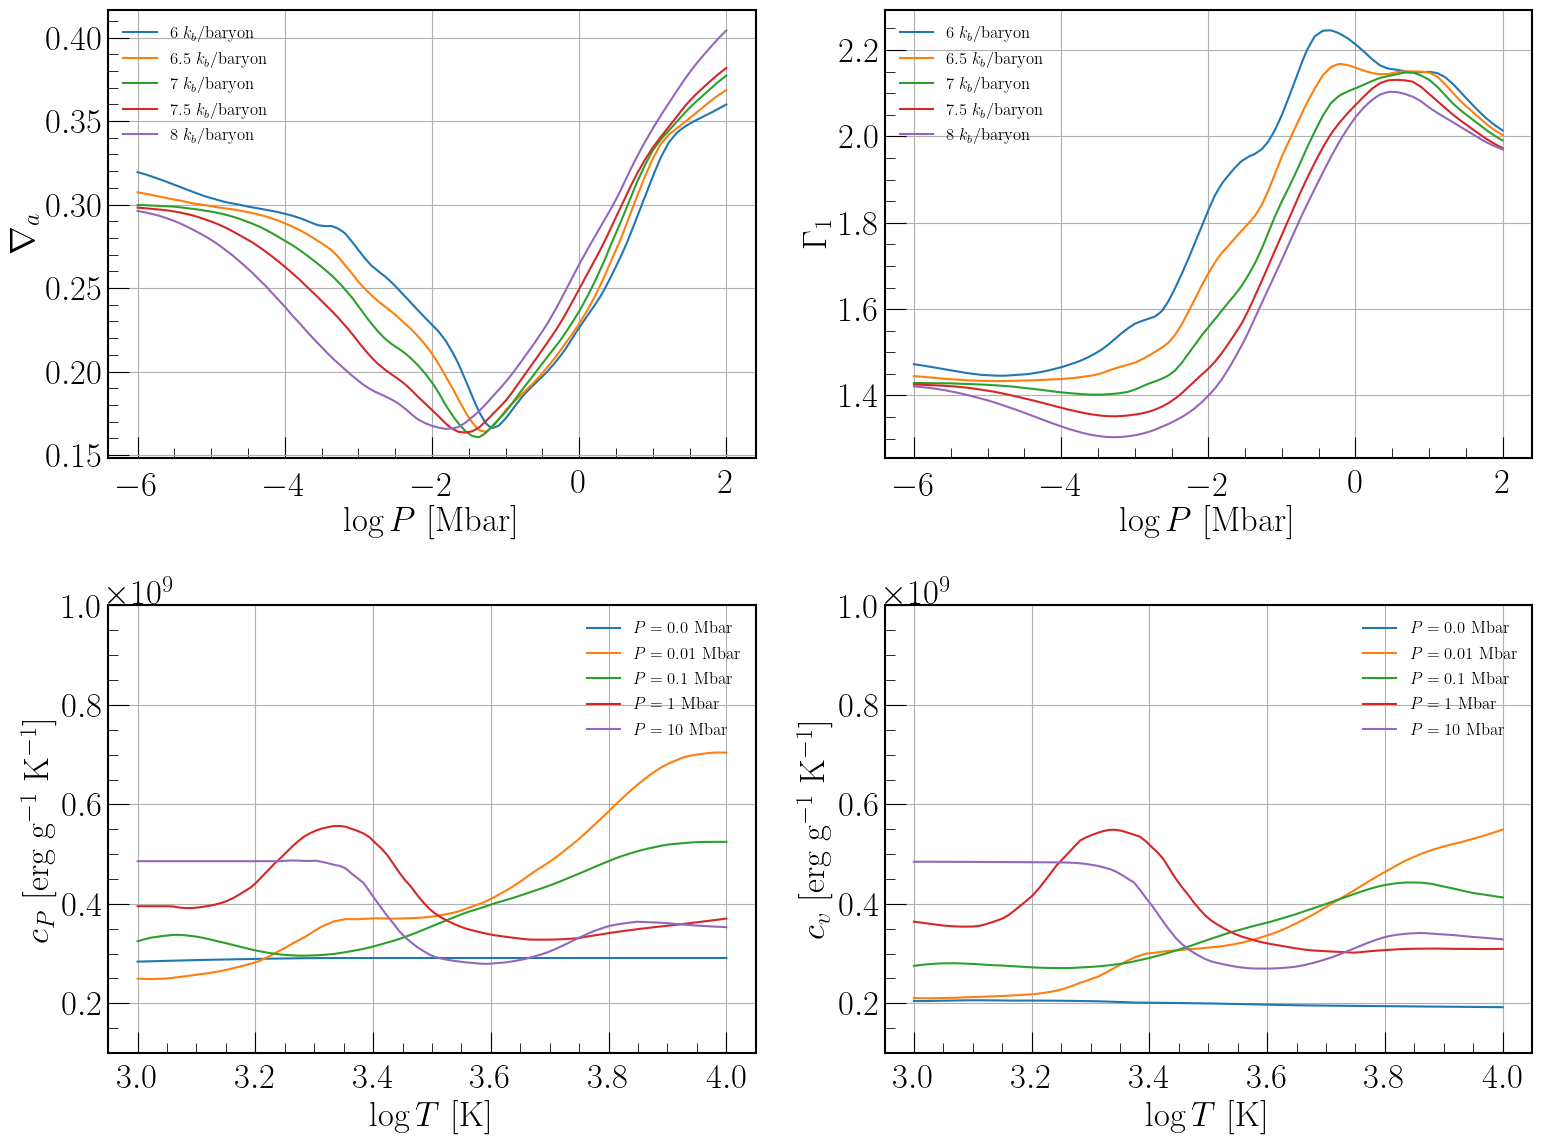

In [81]:
logp = np.linspace(6, 14, 500)
sgrid = [6, 6.5, 7, 7.5, 8]
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))
plt.figure(figsize=(16,12))

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for s in sgrid:
    s_ = np.full_like(logp, s)
    logrho, logt = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    grada = mixtures_eos.get_nabla_ad(s_, logp, y, z, hhe_eos='cms', dp=0.1, tab=True)
    gamma1 = mixtures_eos.get_gamma1(s_, logp, y, z, hhe_eos='cms', dp=0.1)

    ax1.plot(logp-12, grada, label='${}\ k_b/$baryon'.format(s))
    ax2.plot(logp-12, gamma1, label='${}\ k_b/$baryon'.format(s))

logpgrid = [6, 10, 11, 12, 13]

logtgrid = np.linspace(3, 4, 100)
y = np.full_like(logtgrid, 0.277)
z = np.zeros(len(logtgrid))

for p in logpgrid:
    logp_ = np.full_like(logtgrid, p)

    s_val = mixtures_eos.get_s_pt(logp_, logtgrid, y, z, hhe_eos='cms')*erg_to_kbbar
    logrho = mixtures_eos.get_rho_pt(logp_, logtgrid, y, z, hhe_eos='cms')

    cv = mixtures_eos.get_c_v(s_val, logrho, y, z, hhe_eos='cms', ds=0.1, tab=True)
    cp = mixtures_eos.get_c_p(s_val, logp_, y, z, hhe_eos='cms', ds=0.1, tab=True)
    
#     diff = (cp-cv)/cv
#     ratio = cp/cv
#     print(ratio)

    ax3.plot(logtgrid, cp, label='$P = {}$ Mbar'.format(np.round(10**(p-12), 2)))
    ax4.plot(logtgrid, cv, label='$P = {}$ Mbar'.format(np.round(10**(p-12), 2)))

ax1.legend(frameon=False, prop={'size':12})
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$\nabla_a$')
ax1.minorticks_on()

ax2.legend(frameon=False, prop={'size':12})
ax2.set_xlabel('$\log{P}$ [Mbar]')
ax2.set_ylabel(r'$\Gamma_1$')
ax2.minorticks_on()

ax3.legend(frameon=False, prop={'size':12})
ax3.set_ylim(1e8, 1e9)
ax3.set_xlabel('$\log{T}$ [K]')
ax3.set_ylabel(r'$c_P$ [erg g$^{-1}$ K$^{-1}$]')
ax3.minorticks_on()

ax4.legend(frameon=False, prop={'size':12})
ax4.set_ylim(1e8, 1e9)
ax4.set_xlabel('$\log{T}$ [K]')
ax4.set_ylabel(r'$c_v$ [erg g$^{-1}$ K$^{-1}$]')
ax4.minorticks_on()

plt.tight_layout()
plt.show()

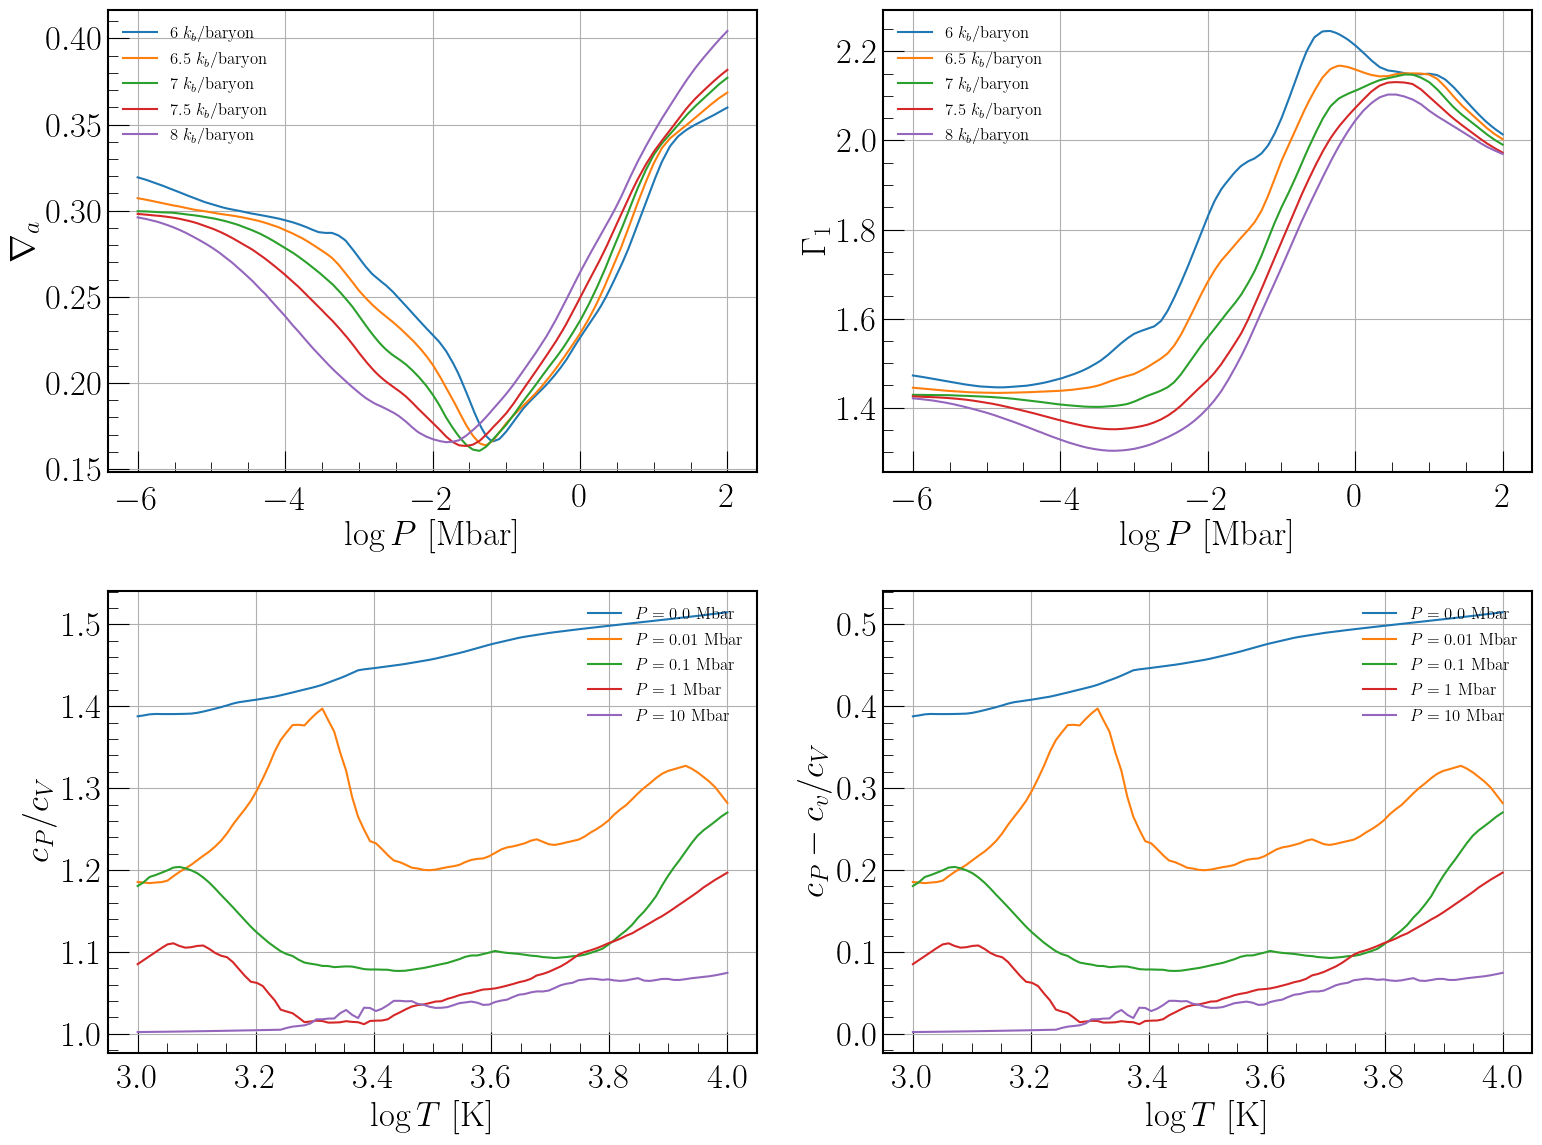

In [80]:
logp = np.linspace(6, 14, 500)
sgrid = [6, 6.5, 7, 7.5, 8]
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))
plt.figure(figsize=(16,12))

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for s in sgrid:
    s_ = np.full_like(logp, s)
    logrho, logt = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    grada = mixtures_eos.get_nabla_ad(s_, logp, y, z, hhe_eos='cms', dp=0.1, tab=True)
    gamma1 = mixtures_eos.get_gamma1(s_, logp, y, z, hhe_eos='cms', dp=0.1)

    ax1.plot(logp-12, grada, label='${}\ k_b/$baryon'.format(s))
    ax2.plot(logp-12, gamma1, label='${}\ k_b/$baryon'.format(s))

logpgrid = [6, 10, 11, 12, 13]

logtgrid = np.linspace(3, 4, 100)
y = np.full_like(logtgrid, 0.277)
z = np.zeros(len(logtgrid))

for p in logpgrid:
    logp_ = np.full_like(logtgrid, p)

    s_val = mixtures_eos.get_s_pt(logp_, logtgrid, y, z, hhe_eos='cms')*erg_to_kbbar
    logrho = mixtures_eos.get_rho_pt(logp_, logtgrid, y, z, hhe_eos='cms')

    cv = mixtures_eos.get_c_v(s_val, logrho, y, z, hhe_eos='cms', ds=0.1, tab=True)
    cp = mixtures_eos.get_c_p(s_val, logp_, y, z, hhe_eos='cms', ds=0.1, tab=True)
    
    diff = (cp-cv)/cv
    ratio = cp/cv
    #print(ratio)

    ax3.plot(logtgrid, ratio, label='$P = {}$ Mbar'.format(np.round(10**(p-12), 2)))
    ax4.plot(logtgrid, diff, label='$P = {}$ Mbar'.format(np.round(10**(p-12), 2)))

ax1.legend(frameon=False, prop={'size':12})
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$\nabla_a$')
ax1.minorticks_on()

ax2.legend(frameon=False, prop={'size':12})
ax2.set_xlabel('$\log{P}$ [Mbar]')
ax2.set_ylabel(r'$\Gamma_1$')
ax2.minorticks_on()

ax3.legend(frameon=False, prop={'size':12})
#ax3.set_ylim(1e8, 1e9)
ax3.set_xlabel('$\log{T}$ [K]')
ax3.set_ylabel(r'$c_P/c_V$')
ax3.minorticks_on()

ax4.legend(frameon=False, prop={'size':12})
#ax4.set_ylim(1e8, 1e9)
ax4.set_xlabel('$\log{T}$ [K]')
ax4.set_ylabel(r'$c_P - c_v / c_V$')
ax4.minorticks_on()

plt.tight_layout()
plt.show()

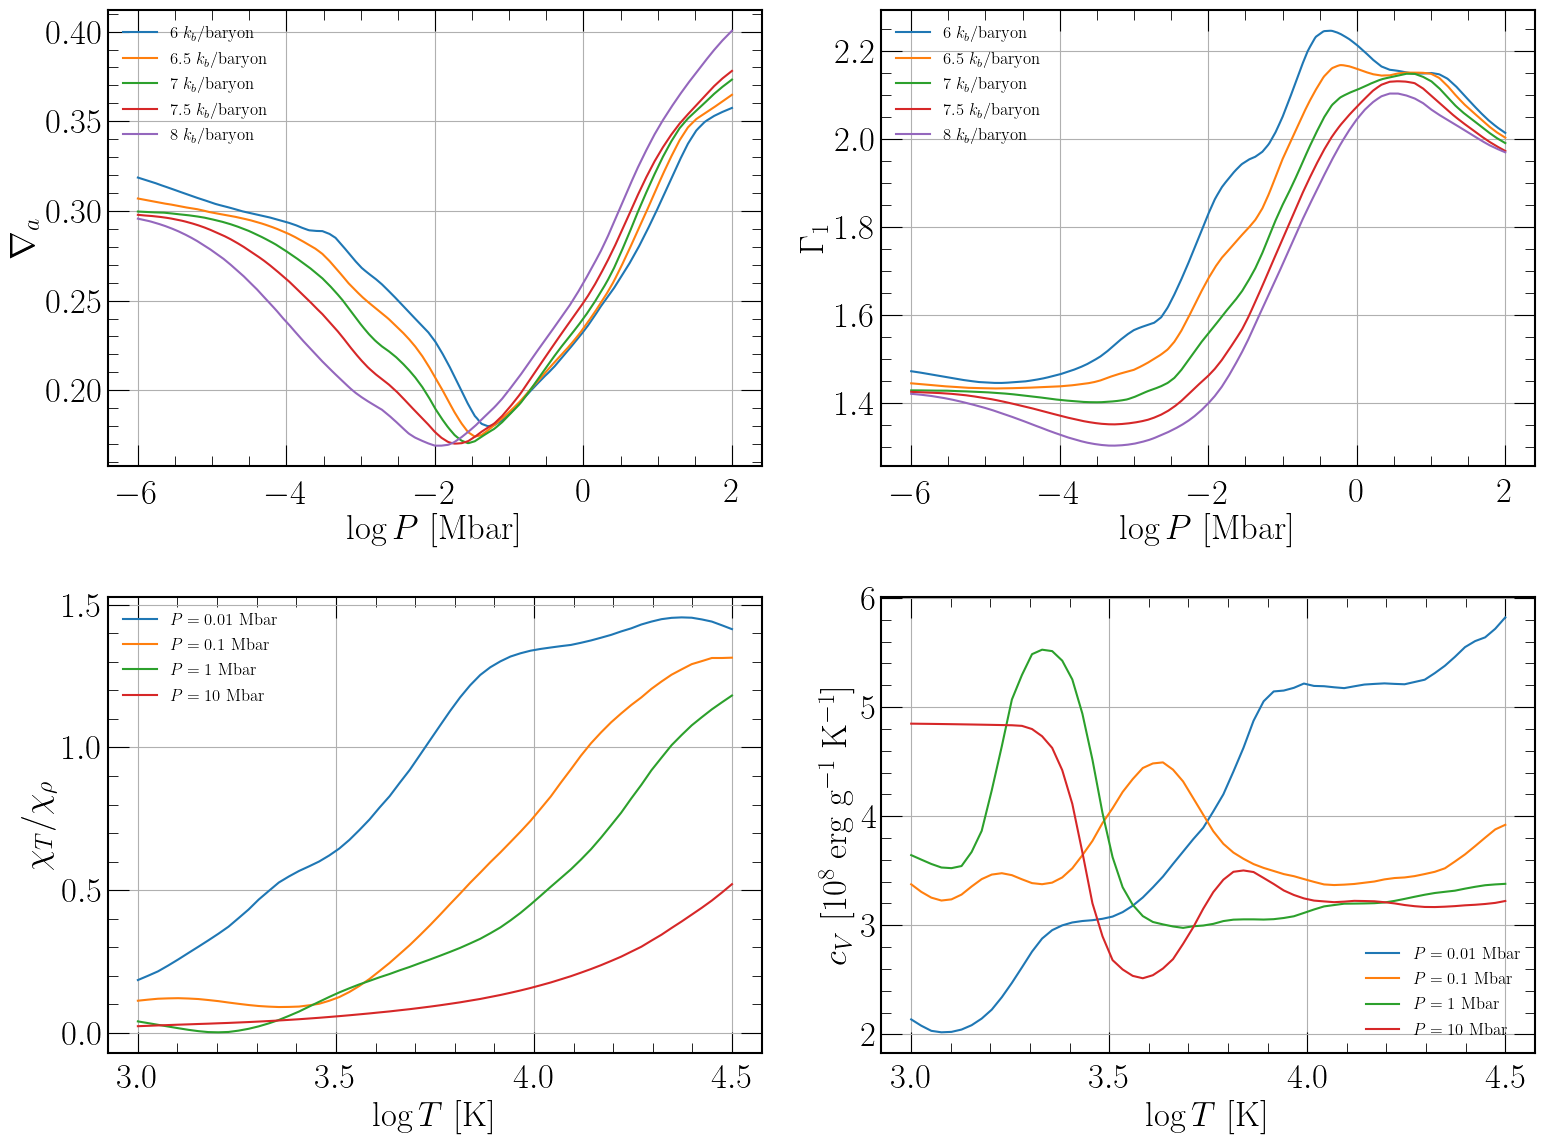

In [3]:
logp = np.linspace(6, 14, 500)
sgrid = [6, 6.5, 7, 7.5, 8]
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))
plt.figure(figsize=(16,12))

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for s in sgrid:
    s_ = np.full_like(logp, s)
    logrho, logt = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    grada = mixtures_eos.get_nabla_ad(s_, logp, y, z, hhe_eos='cms', dp=0.12, tab=True)
    gamma1 = mixtures_eos.get_gamma1(s_, logp, y, z, hhe_eos='cms', dp=0.1)

    ax1.plot(logp-12, grada, label='${}\ k_b/$baryon'.format(s))
    ax2.plot(logp-12, gamma1, label='${}\ k_b/$baryon'.format(s))

logpgrid = [10.5, 11.5, 12, 13]
logp_legend = ['0.01', '0.1', '1', '10']

logtgrid = np.linspace(3, 4.5, 60)
y = np.full_like(logtgrid, 0.277)
z = np.zeros(len(logtgrid))

for i, p in enumerate(logpgrid):
    logp_ = np.full_like(logtgrid, p)

    s_val = mixtures_eos.get_s_pt(logp_, logtgrid, y, z, hhe_eos='cms')*erg_to_kbbar
    logrho = mixtures_eos.get_rho_pt(logp_, logtgrid, y, z, hhe_eos='cms')

    cv = mixtures_eos.get_c_v(s_val, logrho, y, z, hhe_eos='cms', ds=0.06, tab=True)
    drhodt = mixtures_eos.get_drhodt_py(logp_, logtgrid, y, z, hhe_eos='cms')

    ax3.plot(logtgrid, -drhodt, label=r'$P = {}$ Mbar'.format(logp_legend[i]))
    ax4.plot(logtgrid, cv*1e-8, label=r'$P = {}$ Mbar'.format(logp_legend[i]))

ax1.legend(frameon=False, prop={'size':12})
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$\nabla_a$')
ax1.minorticks_on()

ax2.legend(frameon=False, prop={'size':12})
ax2.set_xlabel('$\log{P}$ [Mbar]')
ax2.set_ylabel(r'$\Gamma_1$')
#ax2.axhline(y=1.66, color='k', ls='--')
#ax2.text(-5.7, 1.7, r'Ideal Gas $\gamma = 5/3$', fontsize=18)
ax2.minorticks_on()

ax3.legend(frameon=False, prop={'size':12})
ax3.set_xlabel('$\log{T}$ [K]')
ax3.set_ylabel(r'$\chi_T/\chi_{\rho}$')
ax3.minorticks_on()

ax4.legend(frameon=False, prop={'size':12})
ax4.set_xlabel('$\log{T}$ [K]')
ax4.set_ylabel(r'$c_V$ [$10^8$ erg g$^{-1}$ K$^{-1}$]')
ax4.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')

ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')

plt.tight_layout()

plt.savefig('eos/figs/fig6_derivs_ref_update.pdf', bbox_inches='tight')
plt.show()

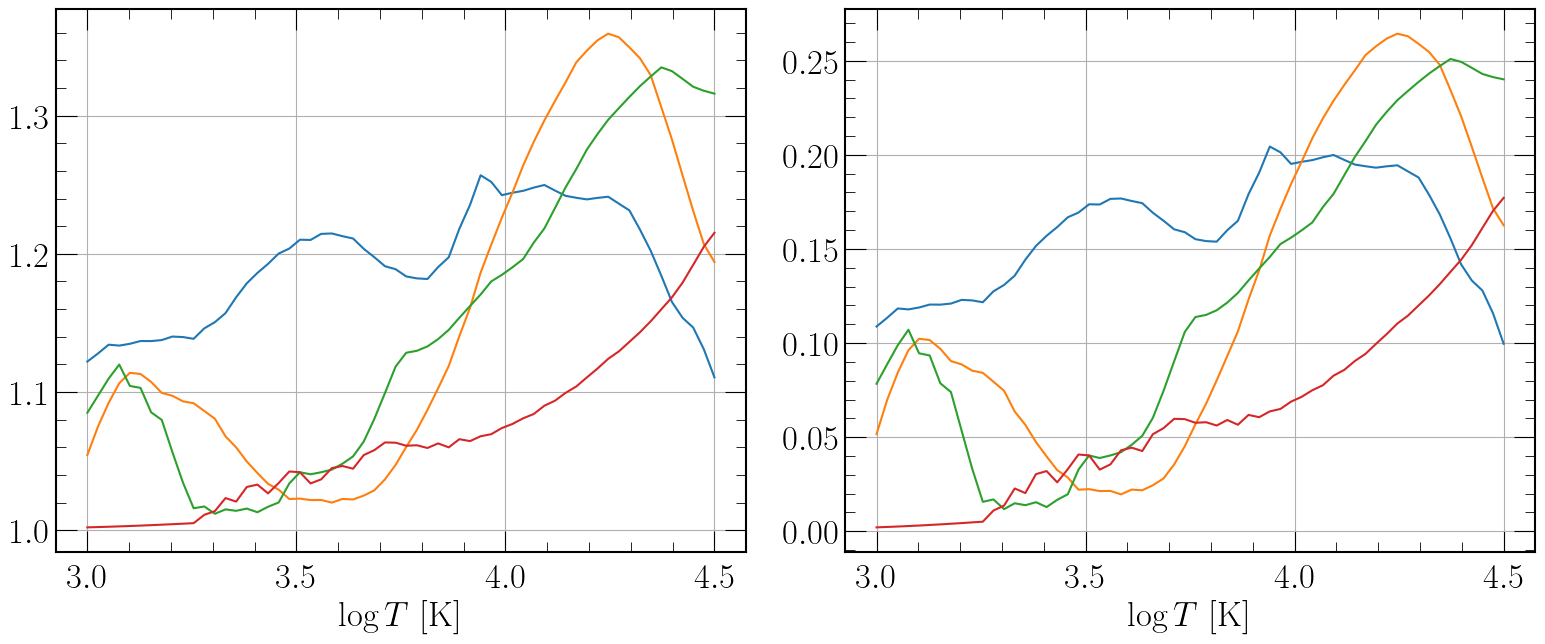

In [45]:
logp = np.linspace(6, 14, 500)
sgrid = [6, 6.5, 7, 7.5, 8]
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

logpgrid = [10.5, 11.5, 12, 13]
logp_legend = ['0.01', '0.1', '1', '10']

logtgrid = np.linspace(3, 4.5, 60)
y = np.full_like(logtgrid, 0.277)
z = np.zeros(len(logtgrid))

for i, p in enumerate(logpgrid):
    logp_ = np.full_like(logtgrid, p)

    s_val = mixtures_eos.get_s_pt(logp_, logtgrid, y, z, hhe_eos='cms')*erg_to_kbbar
    logrho = mixtures_eos.get_rho_pt(logp_, logtgrid, y, z, hhe_eos='cms')

    cv = mixtures_eos.get_c_v(s_val, logrho, y, z, hhe_eos='cms', ds=0.06, tab=True)
    cp = mixtures_eos.get_c_p(s_val, logp_, y, z, hhe_eos='cms', ds=0.06, tab=True)
    
    ratio = cp/cv
    fraction = (cp - cv)/cp

    ax1.plot(logtgrid, ratio, label=r'$P = {}$ Mbar'.format(logp_legend[i]))
    ax2.plot(logtgrid, fraction, label=r'$P = {}$ Mbar'.format(logp_legend[i]))

# ax1.legend(frameon=False, prop={'size':12})
# ax1.set_xlabel('$\log{P}$ [Mbar]')
# ax1.set_ylabel(r'$\nabla_a$')
# ax1.minorticks_on()

# ax2.legend(frameon=False, prop={'size':12})
# ax2.set_xlabel('$\log{P}$ [Mbar]')
# ax2.set_ylabel(r'$\Gamma_1$')
# ax2.axhline(y=1.66, color='k', ls='--')
# ax2.text(-5.7, 1.7, r'Ideal Gas $\gamma = 5/3$', fontsize=18)
# ax2.minorticks_on()

# ax3.legend(frameon=False, prop={'size':12})
ax1.set_xlabel('$\log{T}$ [K]')
# ax3.set_ylabel(r'$\chi_T/\chi_{\rho}$')
ax1.minorticks_on()

# ax4.legend(frameon=False, prop={'size':12})
ax2.set_xlabel('$\log{T}$ [K]')
# ax4.set_ylabel(r'$c_V$ [$10^8$ erg g$^{-1}$ K$^{-1}$]')
ax2.minorticks_on`()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.tight_layout()

#plt.savefig('eos/figs/fig6_derivs_ref_update.pdf', bbox_inches='tight')
plt.show()

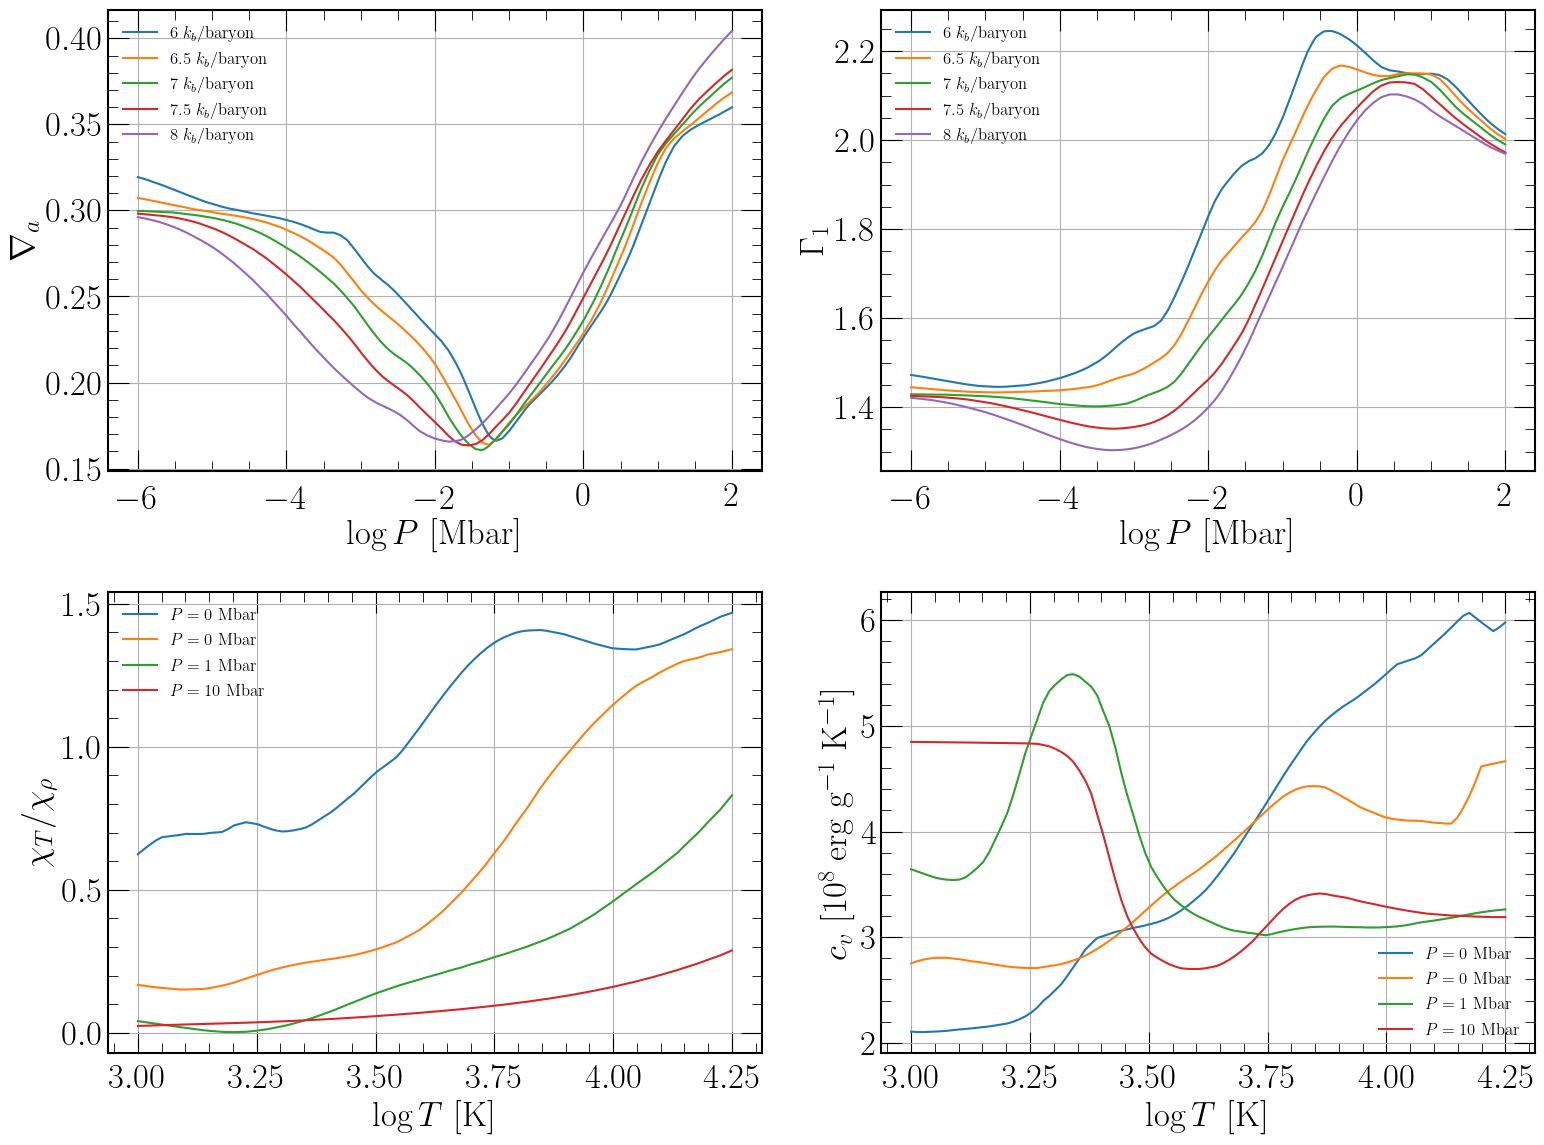

In [28]:
logp = np.linspace(6, 14, 500)
sgrid = [6, 6.5, 7, 7.5, 8]
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))
plt.figure(figsize=(16,12))

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for s in sgrid:
    s_ = np.full_like(logp, s)
    logrho, logt = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    grada = mixtures_eos.get_nabla_ad(s_, logp, y, z, hhe_eos='cms', dp=0.1, tab=True)
    gamma1 = mixtures_eos.get_gamma1(s_, logp, y, z, hhe_eos='cms', dp=0.1)

    ax1.plot(logp-12, grada, label='${}\ k_b/$baryon'.format(s))
    ax2.plot(logp-12, gamma1, label='${}\ k_b/$baryon'.format(s))

logpgrid = [10, 11, 12, 13]

logtgrid = np.linspace(3, 4.25, 100)
y = np.full_like(logtgrid, 0.277)
z = np.zeros(len(logtgrid))

for p in logpgrid:
    logp_ = np.full_like(logtgrid, p)

    s_val = mixtures_eos.get_s_pt(logp_, logtgrid, y, z, hhe_eos='cms')*erg_to_kbbar
    logrho = mixtures_eos.get_rho_pt(logp_, logtgrid, y, z, hhe_eos='cms')

    cv = mixtures_eos.get_c_v(s_val, logrho, y, z, hhe_eos='cms', ds=0.1, tab=True)
    drhodt = mixtures_eos.get_drhodt_py(logp_, logtgrid, y, z, hhe_eos='cms')

    ax3.plot(logtgrid, -drhodt, label='$P = {}$ Mbar'.format(int(np.round(10**(p-12), 3))))
    ax4.plot(logtgrid, cv*1e-8, label='$P = {}$ Mbar'.format(int(np.round(10**(p-12), 3))))

ax1.legend(frameon=False, prop={'size':12})
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$\nabla_a$')
ax1.minorticks_on()

ax2.legend(frameon=False, prop={'size':12})
ax2.set_xlabel('$\log{P}$ [Mbar]')
ax2.set_ylabel(r'$\Gamma_1$')
ax2.minorticks_on()

ax3.legend(frameon=False, prop={'size':12})
ax3.set_xlabel('$\log{T}$ [K]')
ax3.set_ylabel(r'$\chi_T/\chi_{\rho}$')
ax3.minorticks_on()

ax4.legend(frameon=False, prop={'size':12})
ax4.set_xlabel('$\log{T}$ [K]')
ax4.set_ylabel(r'$c_v$ [$10^8$ erg g$^{-1}$ K$^{-1}$]')
ax4.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')

ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')

plt.tight_layout()
plt.show()

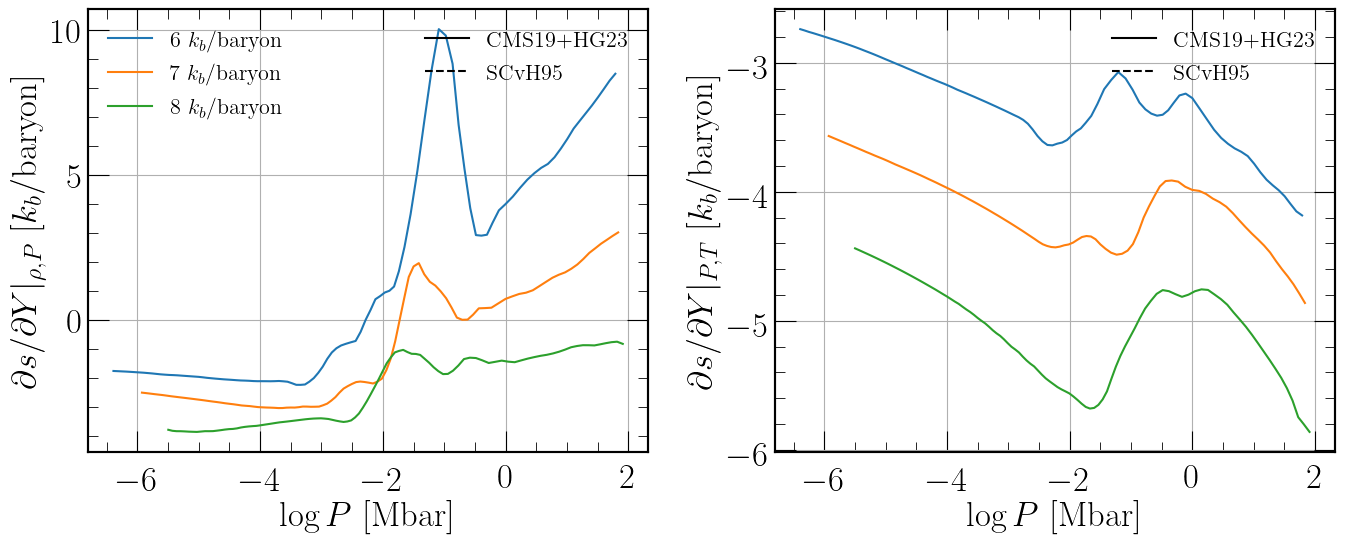

In [54]:
logp = np.linspace(6, 14, 100)
sgrid = [6, 7, 8]
#sgrid = np.arange(6.0, 9.0, 0.5)
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

# dsdy_pt = []
# dsdy_rhop = []

# # norm = mpl.colors.Normalize(
# #     vmin=np.min(sgrid),
# #     vmax=9.0)

# # choose a colormap
# c_m = mpl.cm.viridis

# create a ScalarMappable and initialize a data structure
# s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
# s_m.set_array([])

plt.figure(figsize=(14,6))

ax1 = plt.subplot(1, 2, 1)
ax12 = ax1.twinx()
ax2 = plt.subplot(1, 2, 2)
ax22 = ax2.twinx()
logrho_grid = np.linspace(-3, 0.7, len(logp))

for i,s in enumerate(sgrid):
    s_ = np.full_like(logp, s)
    
    logp_srho_cms = mixtures_eos.get_p_srho_tab(s_, logrhogrid, y, z, hhe_eos)
    logt_srho_cms = mixtures_eos.get_t_srho_tab(s_, logrhogrid, y, z, hhe_eos)
    
    logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
#     dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp, logt_cms, y, z, hhe_eos='cms')*erg_to_kbbar
#     dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_cms, y, z, hhe_eos='cms', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_srho_cms, logt_srho_cms, y, z, hhe_eos='cms')*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_grid, y, z, hhe_eos='cms', 
                                                    ds=0.1, dy=0.1)*erg_to_kbbar
    
#     logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='scvh')
#     dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp, logt_scvh, y, z, hhe_eos='scvh')*erg_to_kbbar
#     dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_scvh, y, z, hhe_eos='scvh', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
#     logrho_cms, logt_cms = cms_eos.get_rhot_sp_tab(logp, s_, y)
#     dsdy_pt_cms = cms_eos.get_dsdy_pt(logp, logt_cms, y)*erg_to_kbbar
#     dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_, logrho_cms, y, 
#                                                     ds=0.1, dy=0.15)*erg_to_kbbar

#     ax1.plot(logp-12, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
#     ax1.plot(logp-12, dsdy_pt_cms, c=colors[i], ls='--')
    
    ax1.plot(logp_srho_cms-12, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    #ax1.plot(logp-12, dsdy_rhop_scvh, c=colors[i], ls='--')
    
    ax2.plot(logp_srho_cms-12, dsdy_pt_cms, c=colors[i])#, label='${}\ k_b/$baryon'.format(s))
    #ax2.plot(logp-12, dsdy_pt_scvh, c=colors[i], ls='--')
    
#     ax1.plot(logrho_cms, dsdy_rhop_cms)
#     ax1.plot(logrho_cms, dsdy_pt_cms, ls='--')

# ax12.plot(0,0, c='k', ls='--', label='$P, T$')
# ax12.plot(0,0, c='k', ls='-', label=r'$P, \rho$')
# ax12.set_yticks([])
# ax12.legend(frameon=False, prop={'size':16})

# ax22.plot(0,0, c='k', ls='--', label='$P, T$')
# ax22.plot(0,0, c='k', ls='-', label=r'$P, \rho$')
# ax22.set_yticks([])
# ax22.legend(frameon=False, prop={'size':16})

ax12.plot(0,0, c='k', ls='-', label='CMS19+HG23')
ax12.plot(0,0, c='k', ls='--', label=r'SCvH95')
ax12.set_yticks([])
ax12.legend(frameon=False, prop={'size':16})

ax22.plot(0,0, c='k', ls='-', label='CMS19+HG23')
ax22.plot(0,0, c='k', ls='--', label=r'SCvH95')
ax22.set_yticks([])
ax22.legend(frameon=False, prop={'size':16})

# ax2.plot(0,0, c='k', ls='--', label='$P, T$')
# ax2.plot(0,0, c='k', ls='-', label=r'$P, \rho$')

ax1.set_ylabel(r'$\partial s/\partial Y|_{\rho, P}$ [$k_b/$baryon]')
ax1.set_xlabel('$\log{P}$ [Mbar]')
#ax1.axhline(y=0, ls='--', color='r')
ax1.legend(frameon=False, prop={'size':16})
#ax1.text(-6.0, 4, '$Y = 0.277$', fontsize=15)
ax1.minorticks_on()

ax2.set_ylabel(r'$\partial s/\partial Y|_{P, T}$ [$k_b/$baryon]')
ax2.set_xlabel('$\log{P}$ [Mbar]')
# ax2.set_xlim(0, 1.05)
# ax2.set_ylabel(r'$\partial s/\partial Y$ [$k_b/$baryon]')
# ax2.set_xlabel('Y')
# ax2.axhline(y=0, ls='--', color='r')
# ax2.legend(frameon=False, prop={'size':16})
# ax2.text(0.15, -15, r'$\rho = 1$ g cm$^{-3}$', fontsize=15)
ax2.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

# ax1.set_aspect('equal')
# ax2.set_aspect('equal')
plt.tight_layout()

#plt.savefig('figures/fig7_cbar_ent.pdf', bbox_inches='tight')

plt.show()

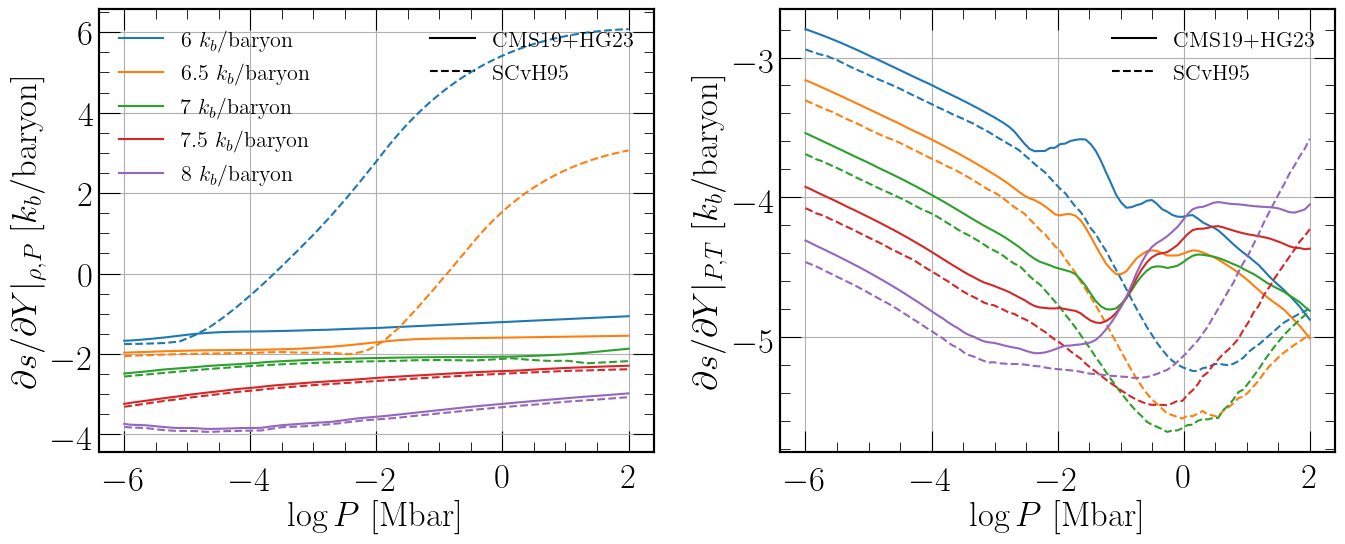

In [99]:
logp = np.linspace(6, 14, 100)
sgrid = [6, 6.5, 7, 7.5, 8]
#sgrid = np.arange(6.0, 9.0, 0.5)
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

# dsdy_pt = []
# dsdy_rhop = []

# # norm = mpl.colors.Normalize(
# #     vmin=np.min(sgrid),
# #     vmax=9.0)

# # choose a colormap
# c_m = mpl.cm.viridis

# create a ScalarMappable and initialize a data structure
# s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
# s_m.set_array([])

plt.figure(figsize=(14,6))

ax1 = plt.subplot(1, 2, 1)
ax12 = ax1.twinx()
ax2 = plt.subplot(1, 2, 2)
ax22 = ax2.twinx()
logrho_grid = np.linspace(-3, 0.7, len(logp))

logrho_calc1 = []
logt_calc1 = []

for i,s in enumerate(sgrid):
    s_ = np.full_like(logp, s)
    
#     logp_srho_cms = mixtures_eos.get_p_srho_tab(s_, logrhogrid, y, z, hhe_eos)
#     logt_srho_cms = mixtures_eos.get_t_srho_tab(s_, logrhogrid, y, z, hhe_eos)
    
    logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp, logt_cms, y, z, hhe_eos='cms')*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_cms, y, z, hhe_eos='cms', 
                                                    ds=0.1, dy=0.1)*erg_to_kbbar
    
#     logrho_calc1.append(logrho_cms)
#     logt_calc1.append(logt_cms)
    
#     dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_srho_cms, logt_srho_cms, y, z, hhe_eos='cms')*erg_to_kbbar
#     dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_grid, y, z, hhe_eos='cms', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
    logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='scvh')
    dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp, logt_scvh, y, z, hhe_eos='scvh')*erg_to_kbbar
    dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_scvh, y, z, hhe_eos='scvh', 
                                                    ds=0.1, dy=0.1)*erg_to_kbbar
    
#     logrho_cms, logt_cms = cms_eos.get_rhot_sp_tab(logp, s_, y)
#     dsdy_pt_cms = cms_eos.get_dsdy_pt(logp, logt_cms, y)*erg_to_kbbar
#     dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_, logrho_cms, y, 
#                                                     ds=0.1, dy=0.15)*erg_to_kbbar

#     ax1.plot(logp-12, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
#     ax1.plot(logp-12, dsdy_pt_cms, c=colors[i], ls='--')
    
    ax1.plot(logp-12, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    ax1.plot(logp-12, dsdy_rhop_scvh, c=colors[i], ls='--')
    
    ax2.plot(logp-12, dsdy_pt_cms, c=colors[i])#, label='${}\ k_b/$baryon'.format(s))
    ax2.plot(logp-12, dsdy_pt_scvh, c=colors[i], ls='--')
    
#     ax1.plot(logrho_cms, dsdy_rhop_cms)
#     ax1.plot(logrho_cms, dsdy_pt_cms, ls='--')

# ax12.plot(0,0, c='k', ls='--', label='$P, T$')
# ax12.plot(0,0, c='k', ls='-', label=r'$P, \rho$')
# ax12.set_yticks([])
# ax12.legend(frameon=False, prop={'size':16})

# ax22.plot(0,0, c='k', ls='--', label='$P, T$')
# ax22.plot(0,0, c='k', ls='-', label=r'$P, \rho$')
# ax22.set_yticks([])
# ax22.legend(frameon=False, prop={'size':16})

ax12.plot(0,0, c='k', ls='-', label='CMS19+HG23')
ax12.plot(0,0, c='k', ls='--', label=r'SCvH95')
ax12.set_yticks([])
ax12.legend(frameon=False, prop={'size':16})

ax22.plot(0,0, c='k', ls='-', label='CMS19+HG23')
ax22.plot(0,0, c='k', ls='--', label=r'SCvH95')
ax22.set_yticks([])
ax22.legend(frameon=False, prop={'size':16})

# ax2.plot(0,0, c='k', ls='--', label='$P, T$')
# ax2.plot(0,0, c='k', ls='-', label=r'$P, \rho$')

ax1.set_ylabel(r'$\partial s/\partial Y|_{\rho, P}$ [$k_b/$baryon]')
ax1.set_xlabel('$\log{P}$ [Mbar]')
#ax1.axhline(y=0, ls='--', color='r')
ax1.legend(frameon=False, prop={'size':16})
#ax1.text(-6.0, 4, '$Y = 0.277$', fontsize=15)
ax1.minorticks_on()

ax2.set_ylabel(r'$\partial s/\partial Y|_{P, T}$ [$k_b/$baryon]')
ax2.set_xlabel('$\log{P}$ [Mbar]')
# ax2.set_xlim(0, 1.05)
# ax2.set_ylabel(r'$\partial s/\partial Y$ [$k_b/$baryon]')
# ax2.set_xlabel('Y')
# ax2.axhline(y=0, ls='--', color='r')
# ax2.legend(frameon=False, prop={'size':16})
# ax2.text(0.15, -15, r'$\rho = 1$ g cm$^{-3}$', fontsize=15)
ax2.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

# ax1.set_aspect('equal')
# ax2.set_aspect('equal')
plt.tight_layout()

#plt.savefig('figures/fig7_cbar_ent.pdf', bbox_inches='tight')

plt.show()

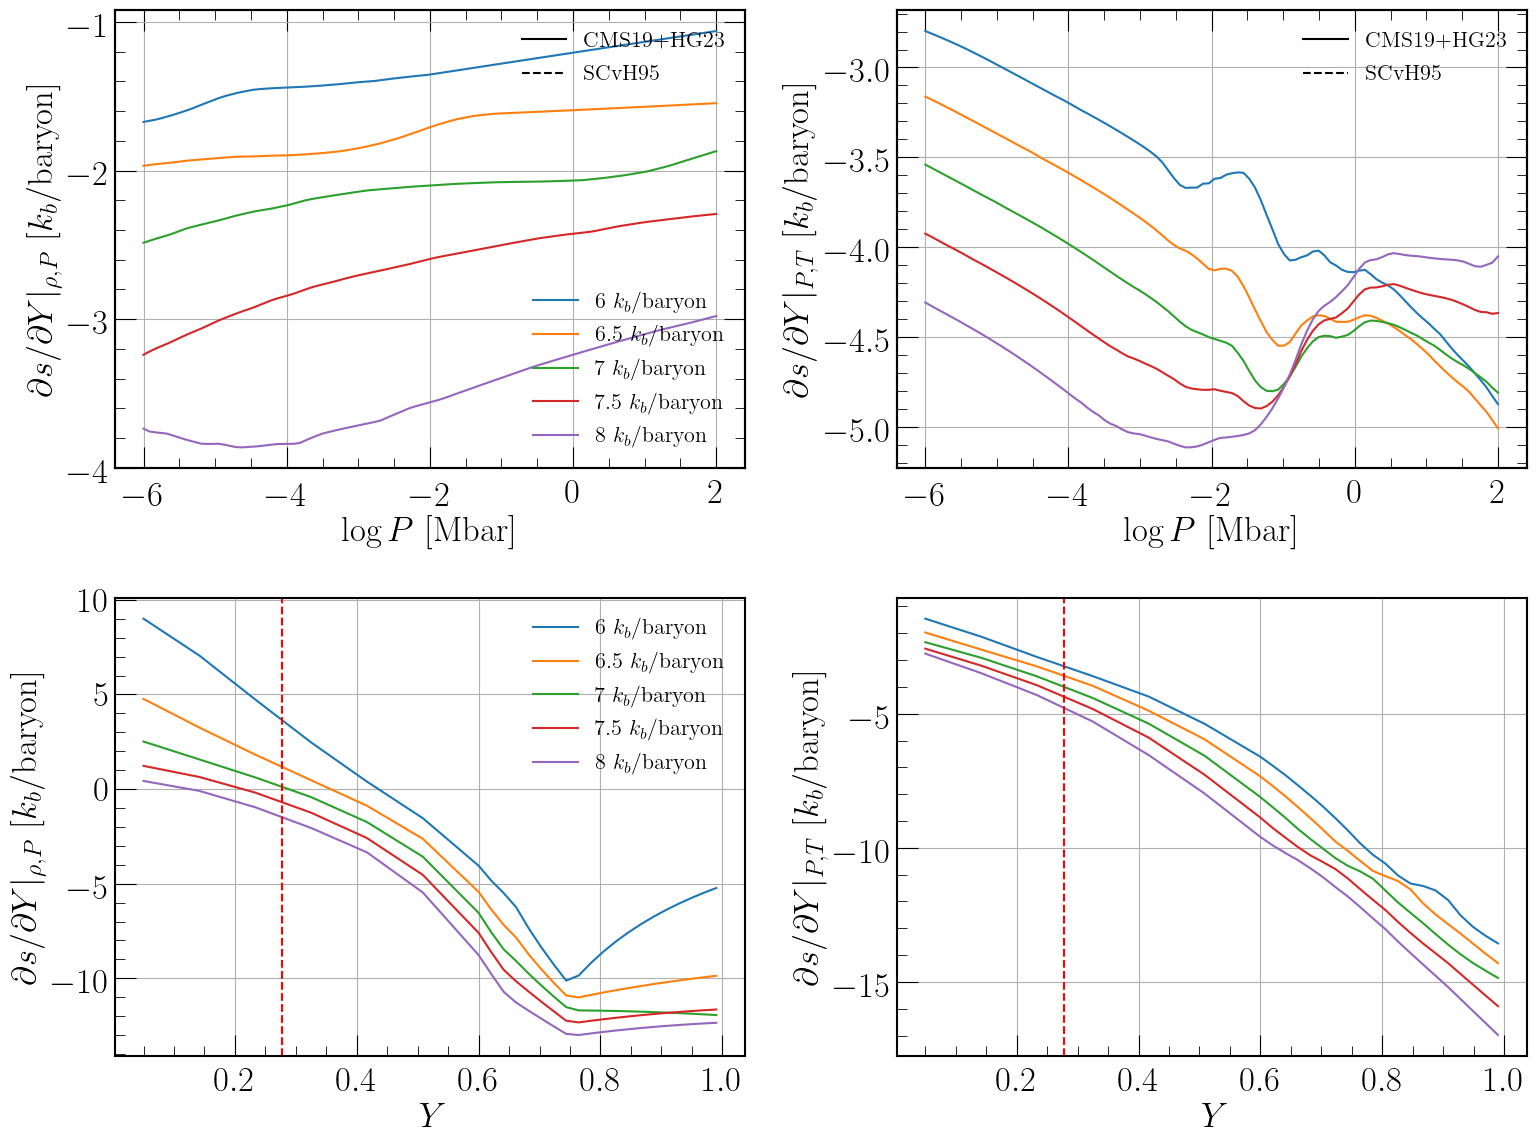

In [58]:
logp = np.linspace(6, 14, 100)
sgrid = [6, 6.5, 7, 7.5, 8]
#sgrid = np.arange(6.0, 9.0, 0.5)
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

# dsdy_pt = []
# dsdy_rhop = []

# # norm = mpl.colors.Normalize(
# #     vmin=np.min(sgrid),
# #     vmax=9.0)

# # choose a colormap
# c_m = mpl.cm.viridis

# create a ScalarMappable and initialize a data structure
# s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
# s_m.set_array([])

plt.figure(figsize=(16,12))

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

#ax1 = plt.subplot(1, 2, 1)
ax12 = ax1.twinx()
#ax2 = plt.subplot(1, 2, 2)
ax22 = ax2.twinx()

logrho_grid = np.linspace(-3, 0.7, len(logp))

logrho_calc1 = []
logt_calc1 = []

for i,s in enumerate(sgrid):
    s_ = np.full_like(logp, s)
    
#     logp_srho_cms = mixtures_eos.get_p_srho_tab(s_, logrhogrid, y, z, hhe_eos)
#     logt_srho_cms = mixtures_eos.get_t_srho_tab(s_, logrhogrid, y, z, hhe_eos)
    
    logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp, logt_cms, y, z, hhe_eos='cms')*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_cms, y, z, hhe_eos='cms', 
                                                    ds=0.1, dy=0.1)*erg_to_kbbar
    
#     logrho_calc1.append(logrho_cms)
#     logt_calc1.append(logt_cms)
    
#     dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_srho_cms, logt_srho_cms, y, z, hhe_eos='cms')*erg_to_kbbar
#     dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_grid, y, z, hhe_eos='cms', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
#     logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='scvh')
#     dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp, logt_scvh, y, z, hhe_eos='scvh')*erg_to_kbbar
#     dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_scvh, y, z, hhe_eos='scvh', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
    ax1.plot(logp-12, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    #ax1.plot(logp-12, dsdy_rhop_scvh, c=colors[i], ls='--')
    
    ax2.plot(logp-12, dsdy_pt_cms, c=colors[i])#, label='${}\ k_b/$baryon'.format(s))
    #ax2.plot(logp-12, dsdy_pt_scvh, c=colors[i], ls='--')
    
y_arr = np.linspace(0.05, 0.6, 7)
y_arr = np.append(y_arr, np.linspace(0.6, 0.99, 20))
logrhogrid = np.zeros(len(y_arr))-0.15501229366771738
z = np.zeros(len(y_arr))

for i,s in enumerate(sgrid):
    s_ = np.full_like(y_arr, s)
    
#     logp_srho_cms = mixtures_eos.get_p_srho_tab(s_, logrhogrid, y, z, hhe_eos)
#     logt_srho_cms = mixtures_eos.get_t_srho_tab(s_, logrhogrid, y, z, hhe_eos)
    
#     logrho_cms, logt_cms = cms_eos.get_rhot_sp_tab(s_, logp_const, y_arr)
#     dsdy_pt_cms = cms_eos.get_dsdy_pt(logp_const, logt_cms, y_arr)*erg_to_kbbar
#     dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_, logrho_cms, y_arr, 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar

    #s_val = np.full_like(logrhogrid, s)
    logp = cms_eos.get_p_srho_tab(s_, logrhogrid, y_arr)
    logt = cms_eos.get_t_srho_tab(s_, logrhogrid, y_arr)

    dsdy_pt_cms = cms_eos.get_dsdy_pt(logp, logt, y_arr)*erg_to_kbbar
    dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_, logrhogrid, y_arr, ds=0.1, dy=0.15)*erg_to_kbbar
    
    logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(s_, logp, y_arr, z, hhe_eos='cms')
    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp, logt, y_arr, z, hhe_eos='cms')*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrhogrid, y_arr, z, hhe_eos='cms',
                                                    ds=0.1, dy=0.15)*erg_to_kbbar
    
#     logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(logp_const, s_, y_arr, z, hhe_eos='scvh')
#     dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp_const, logt_scvh, y_arr, z, hhe_eos='scvh')*erg_to_kbbar
#     dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_scvh, y_arr, z, hhe_eos='scvh', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
    ax3.plot(y_arr, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    #ax3.plot(y_arr, dsdy_rhop_scvh, c=colors[i], ls='--')
    
    ax4.plot(y_arr, dsdy_pt_cms, c=colors[i])#, label='${}\ k_b/$baryon'.format(s))
    #ax4.plot(y_arr, dsdy_pt_scvh, c=colors[i], ls='--')
    



ax12.plot(0,0, c='k', ls='-', label='CMS19+HG23')
ax12.plot(0,0, c='k', ls='--', label=r'SCvH95')
ax12.set_yticks([])
ax12.legend(frameon=False, prop={'size':16})

ax22.plot(0,0, c='k', ls='-', label='CMS19+HG23')
ax22.plot(0,0, c='k', ls='--', label=r'SCvH95')
ax22.set_yticks([])
ax22.legend(frameon=False, prop={'size':16})

ax1.set_ylabel(r'$\partial s/\partial Y|_{\rho, P}$ [$k_b/$baryon]')
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.legend(frameon=False, prop={'size':16})
#ax1.text(-6.0, 1, '$Y = 0.277$', fontsize=18)
ax1.minorticks_on()

#ax2.text(-6.0, -5.5, '$Y = 0.277$', fontsize=18)
ax2.set_ylabel(r'$\partial s/\partial Y|_{P, T}$ [$k_b/$baryon]')
ax2.set_xlabel('$\log{P}$ [Mbar]')
ax2.minorticks_on()

ax3.set_ylabel(r'$\partial s/\partial Y|_{\rho, P}$ [$k_b/$baryon]')
ax3.set_xlabel('$Y$')
ax3.legend(frameon=False, prop={'size':16})
#ax3.text(0.3, 10, r'$\rho = 4$ g cm$^{-3}$', fontsize=18)
ax3.axvline(x=0.277, color='r', ls='--')
ax3.minorticks_on()

ax4.set_ylabel(r'$\partial s/\partial Y|_{P, T}$ [$k_b/$baryon]')
ax4.set_xlabel('$Y$')
#ax4.legend(frameon=False, prop={'size':16})
#ax4.text(0.3, 10, r'$\rho = 4$ g cm$^{-3}$', fontsize=18)
ax4.axvline(x=0.277, color='r', ls='--')
ax4.minorticks_on()



ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.tight_layout()

#plt.savefig('figures/fig7_cbar_ent.pdf', bbox_inches='tight')

plt.show()

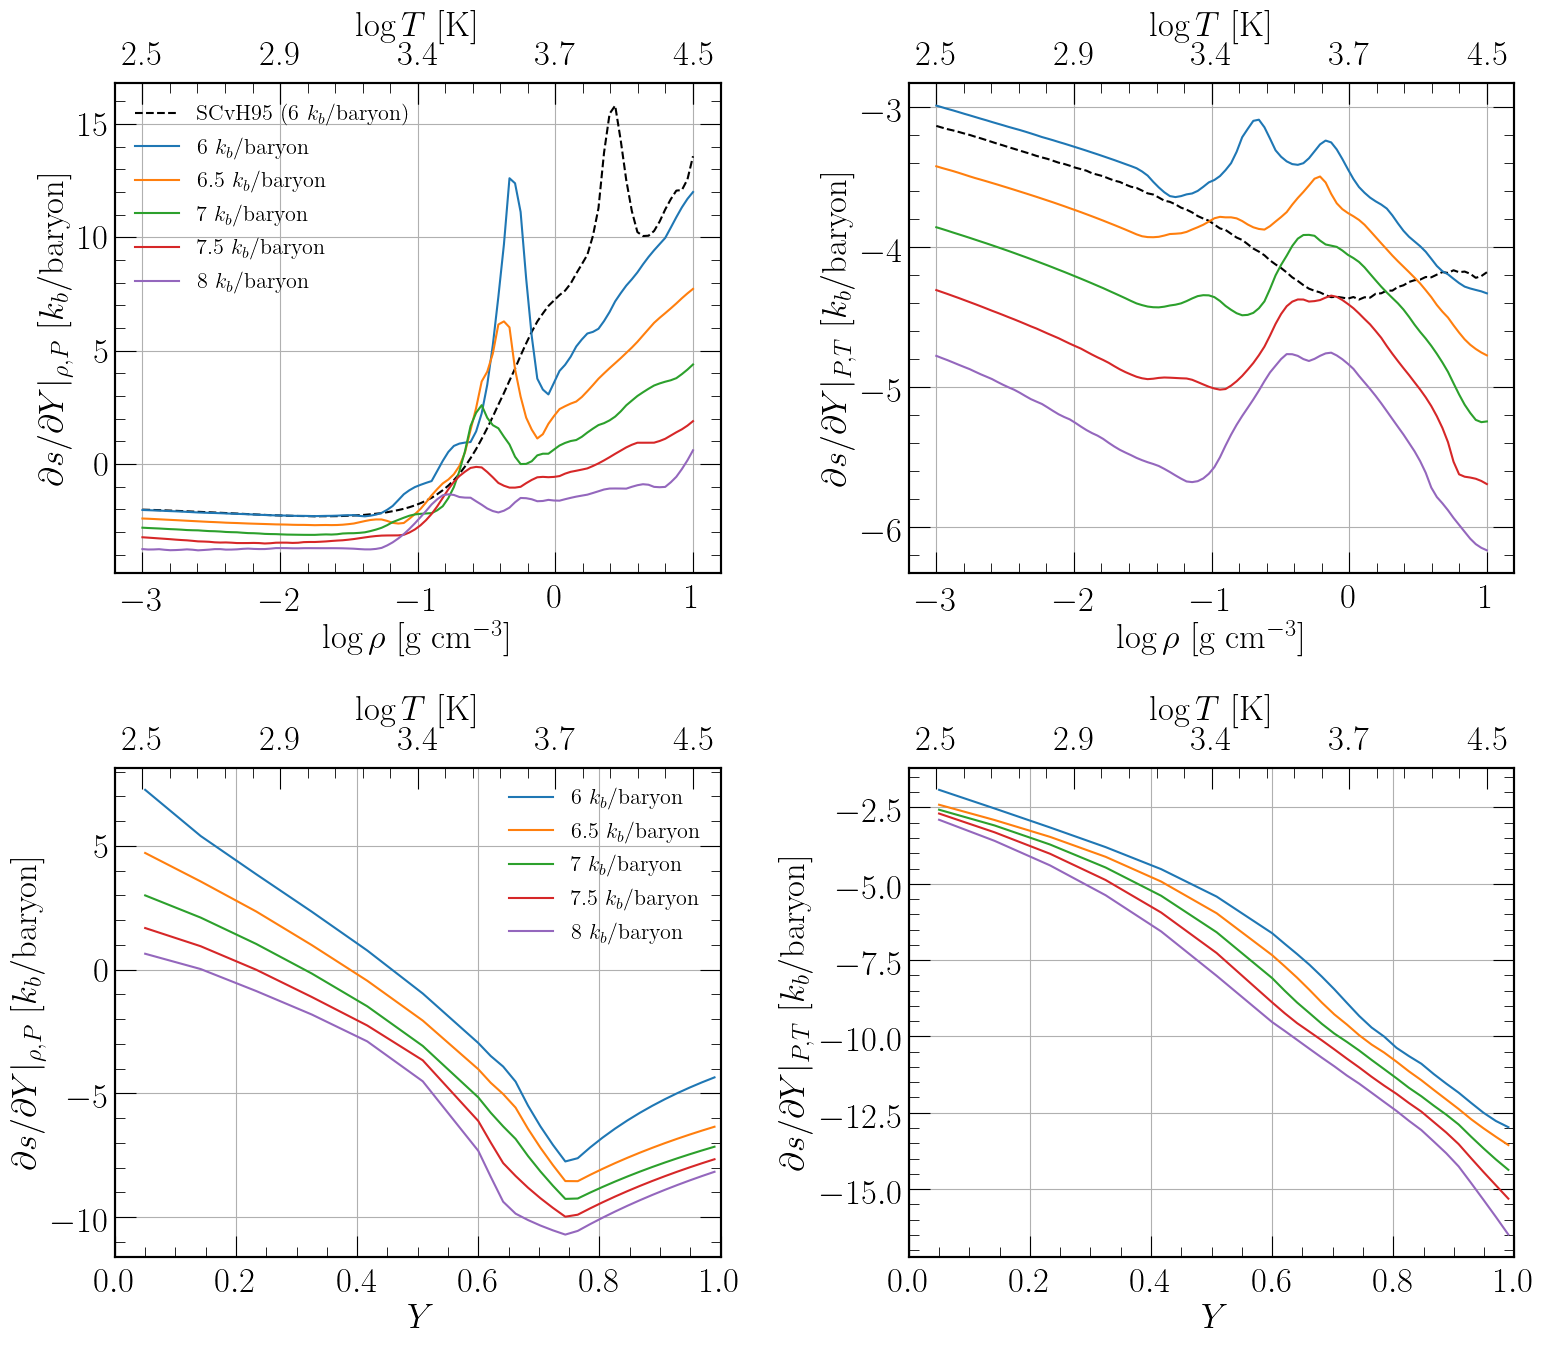

In [112]:
logp = np.linspace(6, 14, 100)
sgrid = [6, 6.5, 7, 7.5, 8]
#sgrid = np.arange(6.0, 9.0, 0.5)
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

# dsdy_pt = []
# dsdy_rhop = []

# # norm = mpl.colors.Normalize(
# #     vmin=np.min(sgrid),
# #     vmax=9.0)

# # choose a colormap
# c_m = mpl.cm.viridis

# create a ScalarMappable and initialize a data structure
# s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
# s_m.set_array([])

plt.figure(figsize=(16,14))

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

#ax1 = plt.subplot(1, 2, 1)
#ax12 = ax1.twinx()
#ax2 = plt.subplot(1, 2, 2)
#ax22 = ax2.twinx()

logrhogrid = np.linspace(-3, 1.0, len(logp))

logrho_calc1 = []
logt_calc1 = []

for i,s in enumerate(sgrid):
    s_ = np.full_like(logp, s)
    
    logp_srho_cms = mixtures_eos.get_p_srho_tab(s_, logrhogrid, y, z, hhe_eos='cms')
    logt_srho_cms = mixtures_eos.get_t_srho_tab(s_, logrhogrid, y, z, hhe_eos='cms')
    
    #logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_srho_cms, logt_srho_cms, y, z, hhe_eos='cms')*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrhogrid, y, z, hhe_eos='cms', 
                                                    ds=0.05, dy=0.05)*erg_to_kbbar
    
#     logrho_calc1.append(logrho_cms)
#     logt_calc1.append(logt_cms)
    
#     dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_srho_cms, logt_srho_cms, y, z, hhe_eos='cms')*erg_to_kbbar
#     dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_grid, y, z, hhe_eos='cms', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
    
#     dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp, logt_scvh, y, z, hhe_eos='scvh')*erg_to_kbbar
#     dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_scvh, y, z, hhe_eos='scvh', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar

    if i == 0:
        #logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='scvh')
        
        logp_srho_scvh = scvh_eos.get_p_srho_tab(s_, logrhogrid, y)
        logt_srho_scvh = scvh_eos.get_t_srho_tab(s_, logrhogrid, y)
        dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp_srho_scvh, logt_srho_scvh, y, z, hhe_eos='scvh')*erg_to_kbbar
        dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrhogrid, y, z, hhe_eos='scvh', 
                                                        ds=0.07, dy=0.07)*erg_to_kbbar 
        
        ax1.plot(logrhogrid, dsdy_rhop_scvh, 'k--', label='SCvH95 ($6\ k_b$/baryon)')
        ax2.plot(logrhogrid, dsdy_pt_scvh, 'k--', label='SCvH95 ($6\ k_b$/baryon)')
    
    ax1.plot(logrhogrid, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    #ax1.plot(logp-12, dsdy_rhop_scvh, c=colors[i], ls='--')
    
    ax2.plot(logrhogrid, dsdy_pt_cms, c=colors[i])#, label='${}\ k_b/$baryon'.format(s))
    #ax2.plot(logp-12, dsdy_pt_scvh, c=colors[i], ls='--')
    
ax12 = ax1.twiny()
rho_plot = ax1.get_xticks()
y_plot = np.full_like(rho_plot, 0.277)
z_plot = np.zeros(len(rho_plot))
s_plot = np.full_like(rho_plot, 6.0)#np.array([6, 6.5, 7, 7.5, 8])
temp_plot = mixtures_eos.get_t_srho_tab(s_plot, rho_plot, y_plot, z_plot, hhe_eos='cms')

#temp_plot = np.array([int(10**t) for t in temp_plot])

ax12.set_xlim(ax1.get_xlim())
ax12.set_xticklabels(np.round(temp_plot, 1))
ax12.set_xlabel(r'$\log{T}$ [K]')
ax12.grid(False)

ax22 = ax2.twiny()
ax22.set_xlim(ax1.get_xlim())
ax22.set_xticklabels(np.round(temp_plot, 1))
ax22.set_xlabel(r'$\log{T}$ [K]')
ax22.grid(False)

    
y_arr = np.linspace(0.05, 0.6, 7)
y_arr = np.append(y_arr, np.linspace(0.6, 0.99, 20))
logrhogrid = np.zeros(len(y_arr))#-0.15501229366771738
z = np.zeros(len(y_arr))

for i,s in enumerate(sgrid):
    s_ = np.full_like(y_arr, s)
    
#     logp_srho_cms = mixtures_eos.get_p_srho_tab(s_, logrhogrid, y, z, hhe_eos)
#     logt_srho_cms = mixtures_eos.get_t_srho_tab(s_, logrhogrid, y, z, hhe_eos)
    
#     logrho_cms, logt_cms = cms_eos.get_rhot_sp_tab(s_, logp_const, y_arr)
#     dsdy_pt_cms = cms_eos.get_dsdy_pt(logp_const, logt_cms, y_arr)*erg_to_kbbar
#     dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_, logrho_cms, y_arr, 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar

    #s_val = np.full_like(logrhogrid, s)
    logp_cms = cms_eos.get_p_srho_tab(s_, logrhogrid, y_arr)
    logt_cms = cms_eos.get_t_srho_tab(s_, logrhogrid, y_arr)
    
    logp_scvh = scvh_eos.get_p_srho_tab(s_, logrhogrid, y_arr)
    logt_scvh = scvh_eos.get_t_srho_tab(s_, logrhogrid, y_arr)

#     dsdy_pt_cms = cms_eos.get_dsdy_pt(logp_cms, logt_cms, y_arr)*erg_to_kbbar
#     dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_, logrhogrid, y_arr, ds=0.1, dy=0.15)*erg_to_kbbar
    
    #logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(s_, logp_cms, y_arr, z, hhe_eos='cms')
    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_cms, logt_cms, y_arr, z, hhe_eos='cms')*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrhogrid, y_arr, z, hhe_eos='cms',
                                                    ds=0.15, dy=0.15)*erg_to_kbbar
    
    #logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(logp_const, s_, y_arr, z, hhe_eos='scvh')
#     dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp_scvh, logt_scvh, y_arr, z, hhe_eos='scvh')*erg_to_kbbar
#     dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrhogrid, y_arr, z, hhe_eos='scvh', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
    ax3.plot(y_arr, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    #ax3.plot(y_arr, dsdy_rhop_scvh, c=colors[i], ls='--')
    
    ax4.plot(y_arr, dsdy_pt_cms, c=colors[i])#, label='${}\ k_b/$baryon'.format(s))
    #ax4.plot(y_arr, dsdy_pt_scvh, c=colors[i], ls='--')
    


ax32 = ax3.twiny()
ax32.set_xlim(ax1.get_xlim())
ax32.set_xticklabels(np.round(temp_plot, 1))
ax32.set_xlabel(r'$\log{T}$ [K]')
ax32.minorticks_on()
ax32.grid(False)

ax42 = ax4.twiny()
ax42.set_xlim(ax1.get_xlim())
ax42.set_xticklabels(np.round(temp_plot, 1))
ax42.set_xlabel(r'$\log{T}$ [K]')
ax42.minorticks_on()
ax42.grid(False)
#ax12.plot(0,0, c='k', ls='-', label='CMS19+HG23')
#ax12.plot(0,0, c='k', ls='--', label=r'SCvH95')
#ax12.set_yticks([])
#ax12.legend(frameon=False, prop={'size':16})

#ax22.plot(0,0, c='k', ls='-', label='CMS19+HG23')
#ax22.plot(0,0, c='k', ls='--', label=r'SCvH95')
#ax22.set_yticks([])
#ax22.legend(frameon=False, prop={'size':16})

ax1.set_ylabel(r'$\partial s/\partial Y|_{\rho, P}$ [$k_b/$baryon]')
#ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax1.legend(frameon=False, prop={'size':16})
#ax1.text(-6.0, 1, '$Y = 0.277$', fontsize=18)
ax1.minorticks_on()

#ax2.text(-6.0, -5.5, '$Y = 0.277$', fontsize=18)
ax2.set_ylabel(r'$\partial s/\partial Y|_{P, T}$ [$k_b/$baryon]')
#ax2.set_xlabel('$\log{P}$ [Mbar]')
ax2.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax2.minorticks_on()

ax3.set_ylabel(r'$\partial s/\partial Y|_{\rho, P}$ [$k_b/$baryon]')
ax3.set_xlabel('$Y$')
ax3.set_xlim(0, 1)
ax3.legend(frameon=False, prop={'size':16})
#ax3.text(0.3, 10, r'$\rho = 4$ g cm$^{-3}$', fontsize=18)
#ax3.axvline(x=0.277, color='r', ls='--')
ax3.minorticks_on()

ax4.set_ylabel(r'$\partial s/\partial Y|_{P, T}$ [$k_b/$baryon]')
ax4.set_xlabel('$Y$')
ax4.set_xlim(0, 1)
#ax4.legend(frameon=False, prop={'size':16})
#ax4.text(0.3, 10, r'$\rho = 4$ g cm$^{-3}$', fontsize=18)
#ax4.axvline(x=0.277, color='r', ls='--')
ax4.minorticks_on()



ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax3.yaxis.set_ticks_position('both')
# ax3.xaxis.set_ticks_position('both')

ax4.yaxis.set_ticks_position('both')
# ax4.xaxis.set_ticks_position('both')

plt.tight_layout()

plt.savefig('eos/figs/fig7_ref_updated.pdf', bbox_inches='tight')

plt.show()

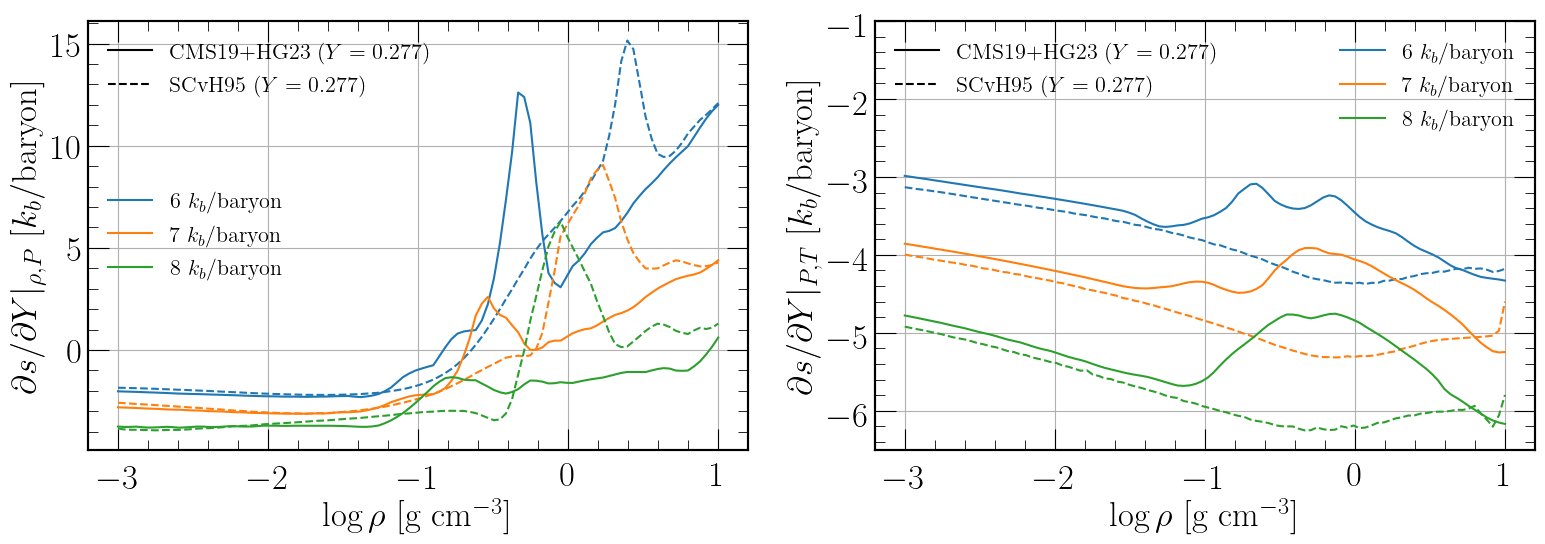

In [3]:
logp = np.linspace(6, 14, 100)
sgrid = [6, 6.5, 7, 7.5, 8]
sgrid = [6, 7, 8]
y = np.full_like(logp, 0.277)
z = np.zeros(len(logp))

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

plt.figure(figsize=(16,6))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
# ax3 = plt.subplot(2, 2, 3)
# ax4 = plt.subplot(2, 2, 4)

#ax1 = plt.subplot(1, 2, 1)
ax12 = ax1.twinx()
#ax2 = plt.subplot(1, 2, 2)
ax22 = ax2.twinx()

logrhogrid = np.linspace(-3, 1.0, len(logp))

logrho_calc1 = []
logt_calc1 = []

for i,s in enumerate(sgrid):
    s_ = np.full_like(logp, s)
    
    logp_srho_cms = mixtures_eos.get_p_srho_tab(s_, logrhogrid, y, z, hhe_eos='cms')
    logt_srho_cms = mixtures_eos.get_t_srho_tab(s_, logrhogrid, y, z, hhe_eos='cms')
    
    logp_srho_scvh = scvh_eos.get_p_srho_tab(s_, logrhogrid, y)
    logt_srho_scvh = scvh_eos.get_t_srho_tab(s_, logrhogrid, y)
    
    #logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='cms')
    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_srho_cms, logt_srho_cms, y, z, hhe_eos='cms')*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrhogrid, y, z, hhe_eos='cms', 
                                                    ds=0.05, dy=0.05)*erg_to_kbbar
    
#     logrho_calc1.append(logrho_cms)
#     logt_calc1.append(logt_cms)
    
#     dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp_srho_cms, logt_srho_cms, y, z, hhe_eos='cms')*erg_to_kbbar
#     dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_grid, y, z, hhe_eos='cms', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar
    
    
#     dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp, logt_scvh, y, z, hhe_eos='scvh')*erg_to_kbbar
#     dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrho_scvh, y, z, hhe_eos='scvh', 
#                                                     ds=0.1, dy=0.1)*erg_to_kbbar

    #if i == 0:
        #logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(logp, s_, y, z, hhe_eos='scvh')
        

    dsdy_pt_scvh = mixtures_eos.get_dsdy_pt(logp_srho_scvh, logt_srho_scvh, y, z, hhe_eos='scvh')*erg_to_kbbar
    dsdy_rhop_scvh = mixtures_eos.get_dsdy_rhop_srho(s_, logrhogrid, y, z, hhe_eos='scvh', 
                                                    ds=0.1, dy=0.1)*erg_to_kbbar 
        
    
    ax1.plot(logrhogrid, dsdy_rhop_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    ax1.plot(logrhogrid, dsdy_rhop_scvh, c=colors[i], ls='--')
    
    ax2.plot(logrhogrid, dsdy_pt_cms, c=colors[i], label='${}\ k_b/$baryon'.format(s))
    ax2.plot(logrhogrid, dsdy_pt_scvh, c=colors[i], ls='--')

    
ax12.plot(0,0, c='k', ls='-', label='CMS19+HG23 ($Y=0.277$)')
ax12.plot(0,0, c='k', ls='--', label=r'SCvH95 ($Y=0.277$)')
ax12.set_yticks([])
ax12.legend(frameon=False, prop={'size':16}, loc='upper left')

ax22.plot(0,0, c='k', ls='-', label='CMS19+HG23 ($Y=0.277$)')
ax22.plot(0,0, c='k', ls='--', label=r'SCvH95 ($Y=0.277$)')
ax22.set_yticks([])
ax22.legend(frameon=False, prop={'size':16}, loc='upper left')

ax1.set_ylabel(r'$\partial s/\partial Y|_{\rho, P}$ [$k_b/$baryon]')
ax1.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax1.legend(frameon=False, prop={'size':16}, loc='center left')
#ax1.set_xlim(-3, 1)
ax1.minorticks_on()

ax2.set_ylabel(r'$\partial s/\partial Y|_{P, T}$ [$k_b/$baryon]')
ax2.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax2.set_ylim(-6.5, -1)
ax2.legend(frameon=False, prop={'size':16})
ax2.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.tight_layout()

plt.savefig('eos/figs/fig7_ref_updated.pdf', bbox_inches='tight')

plt.show()

In [7]:
10**cms_eos.get_t_srho_tab(6, 0, 0.277)

5554.401215887347

3it [00:00, 142.22it/s]


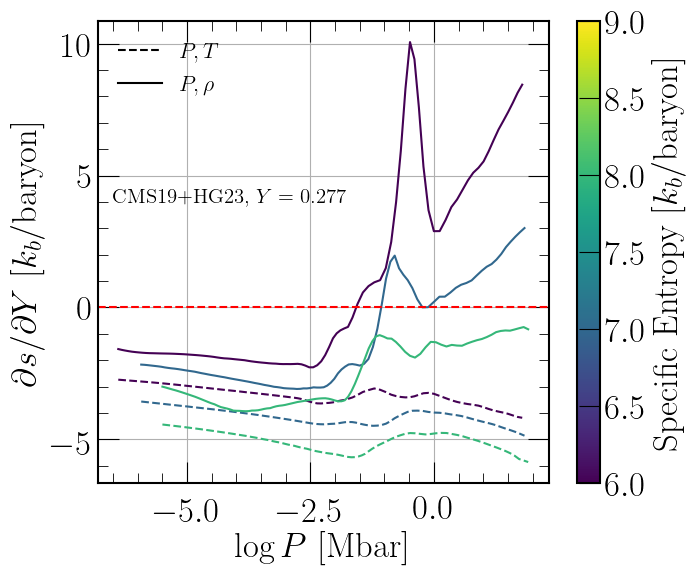

In [58]:
#sgrid = np.arange(6.0, 9.0, 0.5)
sgrid = [6, 7, 8]
logrhogrid = np.linspace(-4, 0.7, 100)
ygrid = np.zeros(len(logrhogrid))+0.277
zgrid = np.zeros(len(logrhogrid))

dsdy_pt = []
dsdy_rhop = []

norm = mpl.colors.Normalize(
    vmin=np.min(sgrid),
    vmax=9.0)

# choose a colormap
c_m = mpl.cm.viridis

# create a ScalarMappable and initialize a data structure
s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

fig = plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
#ax2 = plt.subplot(1, 2, 2)

hhe_eos = 'cms'

logp_calc2 = []
logt_calc2 = []

for i, s in tqdm(enumerate(sgrid)):
    s_val = np.full_like(logrhogrid, s)
    logp = mixtures_eos.get_p_srho_tab(s_val, logrhogrid, ygrid, zgrid, hhe_eos)
    logt = mixtures_eos.get_t_srho_tab(s_val, logrhogrid, ygrid, zgrid, hhe_eos)
    
    logp_calc2.append(logp)
    logt_calc2.append(logt)

    dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp, logt, ygrid, zgrid, hhe_eos)*erg_to_kbbar
    dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_val, logrhogrid, ygrid, zgrid, hhe_eos, ds=0.1, dy=0.15)*erg_to_kbbar

    # dsdy_pt.append(dsdy_pt_cms)
    # dsdy_rhop.append(dsdy_rhop_cms)
    ax1.plot(logp-12, dsdy_rhop_cms, color=c_m(norm(s)))
    ax1.plot(logp-12, dsdy_pt_cms, color=c_m(norm(s)), ls='--')

ax1.plot(0,0, c='k', ls='--', label='$P, T$')
ax1.plot(0,0, c='k', ls='-', label=r'$P, \rho$')

# ax2.plot(0,0, c='k', ls='--', label='$P, T$')
# ax2.plot(0,0, c='k', ls='-', label=r'$P, \rho$')

# ygrid = np.linspace(0.05, 0.6, 10)
# ygrid = np.append(ygrid, np.linspace(0.6, 0.99, 100))
# logrhogrid = np.zeros(len(ygrid))
# zgrid = np.zeros(len(ygrid))

# for i, s in tqdm(enumerate(sgrid)):
#     s_val = np.full_like(logrhogrid, s)
#     logp = mixtures_eos.get_p_srho_tab(s_val, logrhogrid, ygrid, zgrid, hhe_eos)
#     logt = mixtures_eos.get_t_srho_tab(s_val, logrhogrid, ygrid, zgrid, hhe_eos)

#     dsdy_pt_cms = mixtures_eos.get_dsdy_pt(logp, logt, ygrid, zgrid, hhe_eos)*erg_to_kbbar
#     dsdy_rhop_cms = mixtures_eos.get_dsdy_rhop_srho(s_val, logrhogrid, ygrid, zgrid, hhe_eos, ds=0.1, dy=0.1)*erg_to_kbbar

#     # dsdy_pt.append(dsdy_pt_cms)
#     # dsdy_rhop.append(dsdy_rhop_cms)
#     ax2.plot(ygrid, dsdy_rhop_cms, color=c_m(norm(s)))
#     ax2.plot(ygrid, dsdy_pt_cms, color=c_m(norm(s)), ls='--')

fig.colorbar(s_m).set_label('Specific Entropy [$k_b/$baryon]')
#ax1.set_xlim(5, 15)

ax1.set_ylabel(r'$\partial s/\partial Y$ [$k_b/$baryon]')
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.axhline(y=0, ls='--', color='r')
ax1.legend(frameon=False, prop={'size':16})
ax1.text(-6.5, 4, 'CMS19+HG23, $Y = 0.277$', fontsize=15)
ax1.minorticks_on()
    
# ax2.set_xlim(0, 1.05)
# ax2.set_ylabel(r'$\partial s/\partial Y$ [$k_b/$baryon]')
# ax2.set_xlabel('Y')
# ax2.axhline(y=0, ls='--', color='r')
# ax2.legend(frameon=False, prop={'size':16})
# ax2.text(0.15, -15, r'$\rho = 1$ g cm$^{-3}$', fontsize=15)
# ax2.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# ax2.yaxis.set_ticks_position('both')
# ax2.xaxis.set_ticks_position('both')

# ax1.set_aspect('equal')
# ax2.set_aspect('equal')
#plt.tight_layout()

#plt.savefig('figures/fig7_cbar_ent.pdf', bbox_inches='tight')

plt.show()

In [103]:
logp_test = np.linspace(6, 14, 100)
logt_test = np.linspace(2, 5, 100)

y = np.full_like(logp_test, 0.277)
z = np.zeros(len(logp_test))

s_res = mixtures_eos.get_s_pt(logp_test, logt_test, y, z, hhe_eos='cms')
rho_res = mixtures_eos.get_rho_pt(logp_test, logt_test, y, z, hhe_eos='cms')

logt_res = mixtures_eos.get_t_srho_tab(s_res*erg_to_kbbar, rho_res, y, z, hhe_eos='cms')
logp_res = mixtures_eos.get_p_srho_tab(s_res*erg_to_kbbar, rho_res, y, z, hhe_eos='cms')

np.max((logt_test - logt_res) / logt_test)
np.max((logp_test - logp_res) / logp_test)

0.0005798116004063042

In [96]:
logp_res

array([ 6.00301162,  6.08380265,  6.16484752,  6.24558283,  6.32592002,
        6.40662598,  6.48718244,  6.56795921,  6.6486506 ,  6.72930803,
        6.81019713,  6.89093726,  6.97189634,  7.05270404,  7.13333165,
        7.21426195,  7.29546656,  7.37635913,  7.45732827,  7.53795347,
        7.61891317,  7.69972082,  7.78052806,  7.86170235,  7.9422693 ,
        8.02292072,  8.10311295,  8.18434981,  8.26598619,  8.34609517,
        8.42684064,  8.5075861 ,  8.58816751,  8.66913345,  8.74968768,
        8.83037835,  8.91123801,  8.99188321,  9.0727441 ,  9.15354691,
        9.23433686,  9.31508485,  9.39565411,  9.47581976,  9.55689195,
        9.63852917,  9.72127956,  9.80232727,  9.88470664,  9.96471996,
       10.04065396, 10.11534373, 10.20231023, 10.28449348, 10.36670798,
       10.44791684, 10.52843793, 10.60707748, 10.68627597, 10.76648132,
       10.84839422, 10.93105595, 11.01231586, 11.0951848 , 11.17648728,
       11.26010227, 11.34139012, 11.41905286, 11.49901047, 11.57

# Misc tables

In [7]:
l1 = pd.read_csv('misc/lorenzen_misc_data/lor_1Mbar_top.csv', names=['x', 'T'])
l1['T'] /= 1000
l2 = pd.read_csv('misc/lorenzen_misc_data/lor_2Mbar_top.csv', names=['x', 'T'])
l2['T'] /= 1000
l4 = pd.read_csv('misc/lorenzen_misc_data/lorenzen_4mbar.csv').sort_values('x')
l4['T'] /= 1000
l10 = pd.read_csv('misc/lorenzen_misc_data/lorenzen_10mbar.csv').sort_values('x')
l10['T'] /= 1000
l24 = pd.read_csv('misc/lorenzen_misc_data/lorenzen_24mbar.csv').sort_values('x')
l24['T'] /= 1000

mh = 1
mhe = 4.0026

he_fracs = [l1, l2, l4, l10, l24]
pressures = np.array([1, 2, 4, 10, 24])

def x_to_Y(x):
    return (mhe*x/(mh*(1-x) + mhe*x))

def Y_to_x(Y):
    return (Y/mhe/(Y/mhe + (1-Y)/mh))

interp_1Mbar = interp1d(l1['x'], l1['T'], kind='linear', fill_value='extrapolate')
interp_2Mbar = interp1d(l2['x'], l2['T'], kind='linear', fill_value='extrapolate')
interp_4Mbar = interp1d(l4['x'], l4['T'], kind='linear', fill_value='extrapolate')
interp_10Mbar = interp1d(l10['x'], l10['T'], kind='linear', fill_value='extrapolate')
interp_24Mbar = interp1d(l24['x'], l24['T'], kind='linear', fill_value='extrapolate')

# The Lorenzen curves are non-monotonic at low pressures (1 Mbar)
# Therefore, I limit the the curves to within 0.4 in number fraction (~0.7 in mass fraction)
xgrid = np.arange(np.min(l1['x']), np.max(l1['x']), 0.001) 

# Each demixing temperature range is different, so I interpolate across all isobars here
interp_list = [interp_1Mbar, interp_2Mbar, interp_4Mbar, interp_10Mbar, interp_24Mbar]

T_res = []
for i, p in enumerate(pressures):

    t = interp_list[i](xgrid)
    T_res.append(t)

In [8]:
np.shape(T_res)

(5, 413)

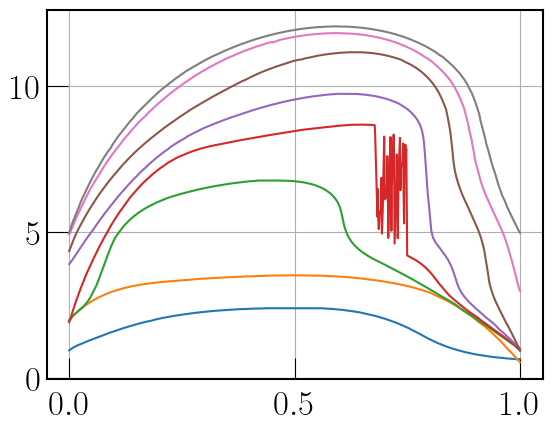

In [12]:
# Reading data

s05 = pd.read_csv('misc/schoettler_nonideal_data/sr18_0_5.csv', names = ['x', 'T']).sort_values('x')
s1 = pd.read_csv('misc/schoettler_nonideal_data/sr18_1.csv', names = ['x', 'T']).sort_values('x')
s1_2 = pd.read_csv('misc/schoettler_nonideal_data/sr18_1_2.csv', names = ['x', 'T']).sort_values('x')
s1_5 = pd.read_csv('misc/schoettler_nonideal_data/sr18_1_5.csv', names = ['x', 'T']).sort_values('x')
s2 = pd.read_csv('misc/schoettler_nonideal_data/sr18_2.csv', names = ['x', 'T']).sort_values('x')
s4 = pd.read_csv('misc/schoettler_nonideal_data/sr18_4.csv', names = ['x', 'T']).sort_values('x')
s10 = pd.read_csv('misc/schoettler_nonideal_data/sr18_10.csv', names = ['x', 'T']).sort_values('x')
s24 = pd.read_csv('misc/schoettler_nonideal_data/sr18_24.csv', names = ['x', 'T']).sort_values('x')

# list of isobars and corresponding pressures
isobars = [s05, s1, s1_2, s1_5, s2, s4, s10, s24]
pressures = np.array([0.5, 1, 1.2, 1.5, 2, 4, 10, 24])

mh = 1
mhe = 4.0026
def x_to_Y(x):
    return (mhe*x/(mh*(1-x) + mhe*x))

def Y_to_x(Y):
    return (Y/mhe/(Y/mhe + (1-Y)/mh))

interp_list = []
for i, table in enumerate(isobars):
    #if i == 3:
    #    interp1 = interp1d(table['T'][table['x'] > 0.6], table['x'][table['x'] > 0.6], kind='linear', fill_value='extrapolate')
    interp = interp1d(table['x'], table['T'], kind='linear', fill_value='extrapolate')
    interp_list.append(interp)
    
xgrid = np.arange(np.min(s05['x']), np.max(s05['x']), 0.001)

T_res = []
for i, p in enumerate(pressures):
    
    t = interp_list[i](xgrid)
    plt.plot(xgrid, t)
    T_res.append(t)

In [11]:
xgrid

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

# Thermodynamic consistency

# Thermodynamic consistency tests

## CMS

$$T = \bigg(\frac{\partial u}{\partial s}\bigg)_{\rho, Y}$$
$$P= \bigg(\frac{\partial u}{\partial \frac{1}{\rho}}\bigg)_{s, Y}$$

In [13]:
# rhovals = np.logspace(-4, 1, 50)
# svals = np.arange(5.75, 9.1, 0.1)
# err_T_res = []
# err_P_res = []
# err_max = []
# p_res = []
# for s in tqdm(svals):
#     err_T = []
#     err_P = []
#     err_m = []
#     for rho in rhovals:
#         t_test = np.log10(cms_eos.get_duds_rhoy_srho(s, np.log10(rho), 0.277, ds=0.01))
#         p_test = np.log10(cms_eos.get_dudrho_sy_srho(s, np.log10(rho), 0.277, drho=0.01))
#         p_val, t_val = cms_eos.get_pt_srho(s, np.log10(rho), 0.277)
#         #comp_val = np.log10(10**p_val / (10**(rho))**2)
#         #print((t_val - t_test)/t_val)
#         err_T.append(float((t_val - t_test)/t_val))
#         err_P.append(float((p_val - p_test)/p_val))
#         err_m.append(max(float((t_val - t_test)/t_val), float((p_val - p_test)/p_val)))

#     err_T_res.append(err_T)
#     err_P_res.append(err_P)
#     err_max.append(err_m)

100%|██████████| 34/34 [00:05<00:00,  6.18it/s]


In [8]:
rhovals = np.logspace(-4, 1, 50)

logpvals = np.linspace(6, 14, 50)
svals = np.arange(5.75, 9.1, 0.1)
err_T_res = []
err_P_res = []
err_max = []
p_res = []
for s in tqdm(svals):
    err_T = []
    err_P = []
    err_m = []
    for p_val in logpvals:
        
        rho_test, t_val = cms_eos.get_rhot_sp_tab(s, p_val, 0.277)
        
        t_test = np.log10(cms_eos.get_duds_rhoy_srho(s, rho_test, 0.277, ds=0.01))
        p_test = np.log10(cms_eos.get_dudrho_sy_srho(s, rho_test, 0.277, drho=0.01))
        #p_val, t_val = cms_eos.get_pt_srho(s, np.log10(rho), 0.277)
        #comp_val = np.log10(10**p_val / (10**(rho))**2)
        #print((t_val - t_test)/t_val)
        err_T.append(float((t_val - t_test)/t_val))
        err_P.append(float((p_val - p_test)/p_val))
        err_m.append(max(float((t_val - t_test)/t_val), float((p_val - p_test)/p_val)))

    err_T_res.append(err_T)
    err_P_res.append(err_P)
    err_max.append(err_m)

100%|██████████| 34/34 [00:05<00:00,  5.83it/s]


In [9]:
sval_grid = np.array([5.75, 6, 7, 8, 9])
logp_locs = np.array([6, 8, 10, 12, 14])
rho_res = cms_eos.get_rho_sp_tab(sval_grid, logp_locs, np.full_like(logp_locs, 0.277))

t_res = cms_eos.get_t_sp_tab(sval_grid, logp_locs, np.full_like(logp_locs, 0.277))

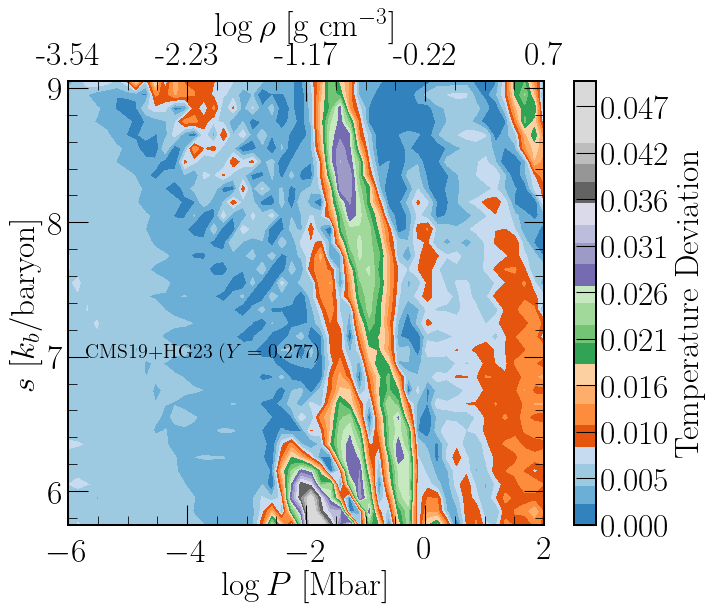

In [8]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals-12, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'viridis_r'#'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax1 = plt.subplot(1, 1, 1)
ax_cont = ax1.contourf(X, Y, abs(np.array(err_T_res)), 150, vmin=0, vmax=0.045, cmap=cmap_abs)
ax_top = ax1.twiny()
#ax_right = ax1.twinx()
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax_cont,format=tick.FormatStrFormatter('%.3f')).set_label('Temperature Deviation')
ax1.set_xlabel(r'$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
#ax_top.set_xlim(ax1.get_xlim())
#ax_top.minorticks_on()
# ax_top.set_xticks(np.round(rho_res, 2))
# ax_top.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
# ax_top.grid(False)

ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xticklabels(np.round(rho_res, 2))
ax_top.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax_top.grid(False)
ax_top.minorticks_on()

# ax_right.set_yticks(np.round(t_res, 2))
# ax_right.set_ylabel(r'$\log{T}$ [K]')
# ax_right.grid(False)
ax1.yaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.text(-5.7, 7.0, 'CMS19+HG23 ($Y = 0.277$)', fontsize=15)
#ax_top.minorticks_on()
ax1.grid(False)
ax1.add_patch(Rectangle((9, 5.8), 3.7, 1.0, color='red', fill=False))
#plt.text(9.5, 6.9, r'$\sim 0.01 \leq \rho \leq 1$ g cm$^{-3}$', color='r', fontsize=15)
#plt.gca().
#plt.savefig('eos/figs/fig6b_ref_updated.pdf', bbox_inches='tight')
plt.show()

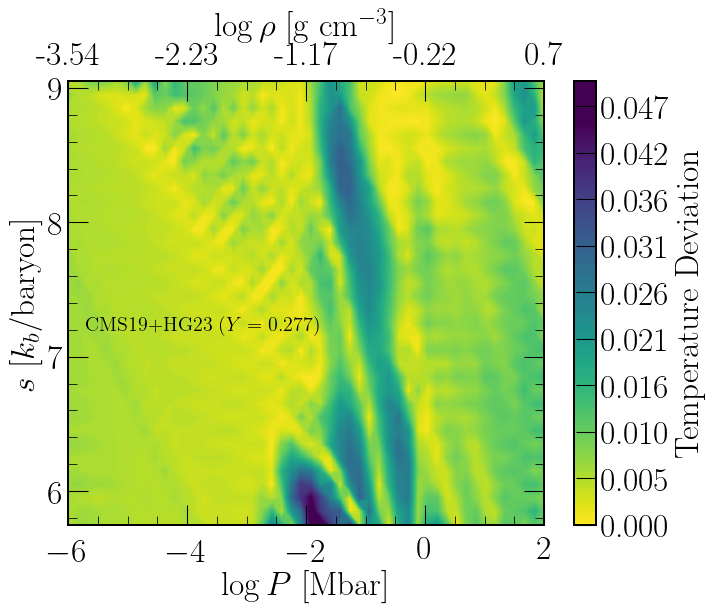

In [10]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals-12, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'viridis_r'#'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax1 = plt.subplot(1, 1, 1)
ax_cont = ax1.contourf(X, Y, abs(np.array(err_T_res)), 150, vmin=0, vmax=0.045, cmap=cmap_poly)
ax_top = ax1.twiny()
#ax_right = ax1.twinx()
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax_cont,format=tick.FormatStrFormatter('%.3f')).set_label('Temperature Deviation')
ax1.set_xlabel(r'$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
#ax_top.set_xlim(ax1.get_xlim())
#ax_top.minorticks_on()
# ax_top.set_xticks(np.round(rho_res, 2))
# ax_top.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
# ax_top.grid(False)

ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xticklabels(np.round(rho_res, 2))
ax_top.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax_top.grid(False)
ax_top.minorticks_on()

# ax_right.set_yticks(np.round(t_res, 2))
# ax_right.set_ylabel(r'$\log{T}$ [K]')
# ax_right.grid(False)
ax1.yaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.text(-5.7, 7.2, 'CMS19+HG23 ($Y = 0.277$)', fontsize=15)
#ax_top.minorticks_on()
ax1.grid(False)
# ax1.add_patch(Rectangle((-3, 5.8), 3.7, 1.0, color='red', fill=False))
# ax1.add_patch(Rectangle((-2.5, 8.0), 3.0, 1.0, color='red', fill=False))
#plt.text(9.5, 6.9, r'$\sim 0.01 \leq \rho \leq 1$ g cm$^{-3}$', color='r', fontsize=15)
#plt.gca().
plt.savefig('eos/figs/fig6b_ref_updated.pdf', bbox_inches='tight')
plt.show()

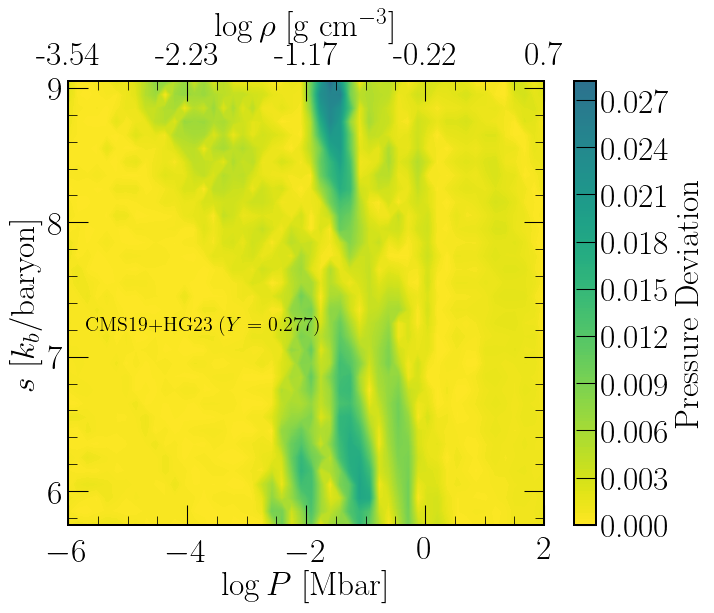

In [49]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals-12, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'viridis_r'#'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax1 = plt.subplot(1, 1, 1)
ax_cont = ax1.contourf(X, Y, abs(np.array(err_P_res)), 150, vmin=0, vmax=0.045, cmap=cmap_poly)
ax_top = ax1.twiny()
#ax_right = ax1.twinx()
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax_cont,format=tick.FormatStrFormatter('%.3f')).set_label('Pressure Deviation')
ax1.set_xlabel(r'$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
#ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xticklabels(np.round(rho_res, 2))
ax_top.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax_top.grid(False)
ax_top.minorticks_on()

# ax_right.set_yticks(np.round(t_res, 2))
# ax_right.set_ylabel(r'$\log{T}$ [K]')
# ax_right.grid(False)
ax1.yaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.text(-5.7, 7.2, 'CMS19+HG23 ($Y = 0.277$)', fontsize=15)
#ax_top.minorticks_on()
ax1.grid(False)
# ax1.add_patch(Rectangle((-3, 5.8), 3.7, 1.0, color='red', fill=False))
# ax1.add_patch(Rectangle((-2.5, 8.0), 2.0, 1.0, color='red', fill=False))
#plt.text(9.5, 6.9, r'$\sim 0.01 \leq \rho \leq 1$ g cm$^{-3}$', color='r', fontsize=15)
#plt.gca().
plt.savefig('eos/figs/fig6a_ref_updated.pdf', bbox_inches='tight')
plt.show()

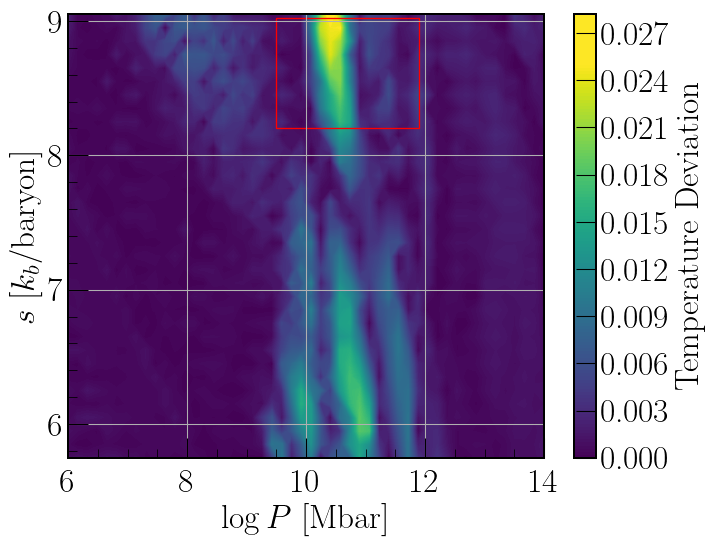

In [39]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'viridis'#'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax = plt.contourf(X, Y, abs(np.array(err_P_res)), 150, vmin=0, vmax=0.025, cmap=cmap_poly)
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax,format=tick.FormatStrFormatter('%.3f')).set_label('Temperature Deviation')
plt.xlabel(r'$\log{P}$ [Mbar]')
#plt.xlabel(r'$\log{P}$ [Mbar]')
plt.ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
plt.minorticks_on()
plt.gca().grid(True)
plt.gca().add_patch(Rectangle((9.5, 8.2), 2.4, 0.82, color='red', fill=False))
plt.savefig('eos/figs/fig6a_ref_updated.pdf', bbox_inches='tight')
plt.show()

## SCvH

In [27]:
rhovals = np.logspace(-4, 1, 50)

logpvals = np.linspace(6, 14, 50)
svals = np.arange(5.75, 9.1, 0.1)
err_T_res = []
err_P_res = []
err_max = []
p_res = []
for s in tqdm(svals):
    err_T = []
    err_P = []
    err_m = []
    for p_val in logpvals:
        
        rho_test, t_val = scvh_eos.get_rhot_sp_tab(s, p_val, 0.277)
        
        t_test = np.log10(scvh_eos.get_duds_rhoy_srho(s, rho_test, 0.277, ds=0.01))
        p_test = np.log10(scvh_eos.get_dudrho_sy_srho(s, rho_test, 0.277, drho=0.01))
        #p_val, t_val = cms_eos.get_pt_srho(s, np.log10(rho), 0.277)
        #comp_val = np.log10(10**p_val / (10**(rho))**2)
        #print((t_val - t_test)/t_val)
        err_T.append(float((t_val - t_test)/t_val))
        err_P.append(float((p_val - p_test)/p_val))
        err_m.append(max(float((t_val - t_test)/t_val), float((p_val - p_test)/p_val)))

    err_T_res.append(err_T)
    err_P_res.append(err_P)
    err_max.append(err_m)

100%|██████████| 34/34 [00:24<00:00,  1.40it/s]


In [29]:
sval_grid = np.array([5.75, 6, 7, 8, 9])
logp_locs = np.array([6, 8, 10, 12, 14])
rho_res = scvh_eos.get_rho_sp_tab(sval_grid, logp_locs, np.full_like(logp_locs, 0.277))

t_res = scvh_eos.get_t_sp_tab(sval_grid, logp_locs, np.full_like(logp_locs, 0.277))

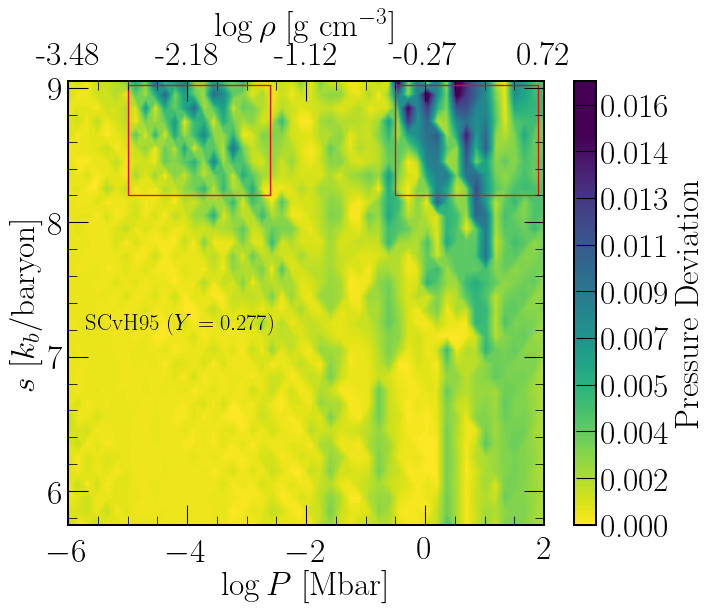

In [32]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals-12, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'viridis_r'#'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax1 = plt.subplot(1, 1, 1)
ax_cont = ax1.contourf(X, Y, abs(np.array(err_P_res)), 150, vmin=0, vmax=0.015, cmap=cmap_poly)
ax_top = ax1.twiny()
#ax_right = ax1.twinx()
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax_cont,format=tick.FormatStrFormatter('%.3f')).set_label('Pressure Deviation')
ax1.set_xlabel(r'$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
#ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xticklabels(np.round(rho_res, 2))
ax_top.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax_top.grid(False)
ax_top.minorticks_on()

# ax_right.set_yticks(np.round(t_res, 2))
# ax_right.set_ylabel(r'$\log{T}$ [K]')
# ax_right.grid(False)
ax1.yaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.text(-5.7, 7.2, 'SCvH95 ($Y = 0.277$)', fontsize=17)
#ax_top.minorticks_on()
ax1.grid(False)
ax1.add_patch(Rectangle((-0.5, 8.2), 2.4, 0.82, color='red', fill=False))
ax1.add_patch(Rectangle((-5, 8.2), 2.4, 0.82, color='red', fill=False))
#plt.text(9.5, 6.9, r'$\sim 0.01 \leq \rho \leq 1$ g cm$^{-3}$', color='r', fontsize=15)
#plt.gca().
plt.savefig('eos/figs/fig6c_ref_updated.pdf', bbox_inches='tight')
plt.show()

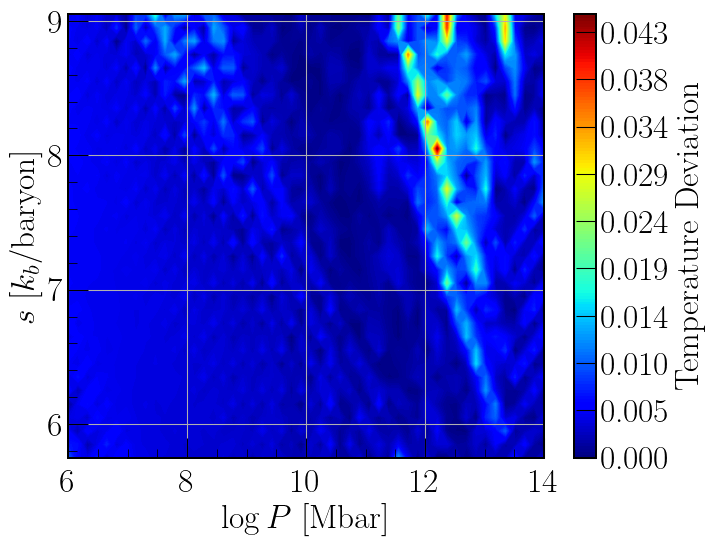

In [5]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax = plt.contourf(X, Y, abs(np.array(err_T_res)), 150, vmin=0, vmax=0.045, cmap=cmap_poly)
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax,format=tick.FormatStrFormatter('%.3f')).set_label('Temperature Deviation')
plt.xlabel(r'$\log{P}$ [Mbar]')
#plt.xlabel(r'$\log{P}$ [Mbar]')
plt.ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
plt.minorticks_on()
plt.gca().grid(True)
#plt.gca().
plt.savefig('eos/figs/fig6d.pdf', bbox_inches='tight')
plt.show()

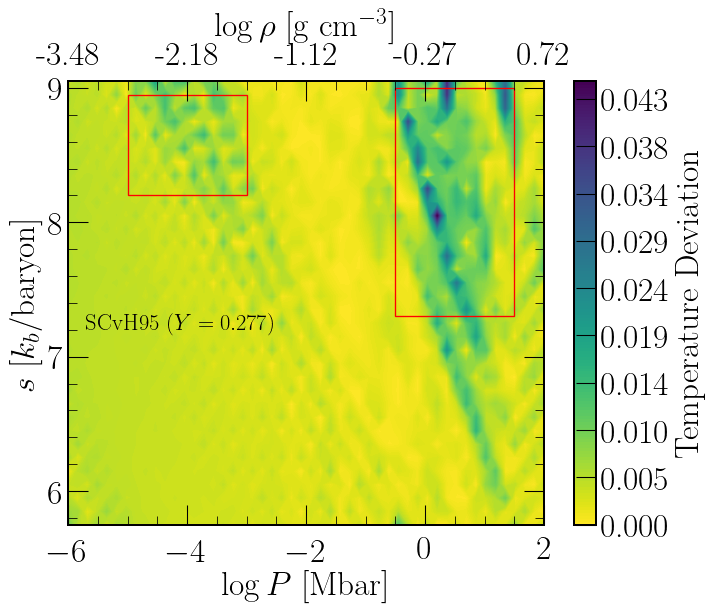

In [43]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals-12, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'viridis_r'#'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax1 = plt.subplot(1, 1, 1)
ax_cont = ax1.contourf(X, Y, abs(np.array(err_T_res)), 150, vmin=0, vmax=0.045, cmap=cmap_poly)
ax_top = ax1.twiny()
#ax_right = ax1.twinx()
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax_cont,format=tick.FormatStrFormatter('%.3f')).set_label('Temperature Deviation')
ax1.set_xlabel(r'$\log{P}$ [Mbar]')
ax1.set_ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
#ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xlim(ax1.get_xlim())
ax_top.set_xticklabels(np.round(rho_res, 2))
ax_top.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax_top.grid(False)
ax_top.minorticks_on()

# ax_right.set_yticks(np.round(t_res, 2))
# ax_right.set_ylabel(r'$\log{T}$ [K]')
# ax_right.grid(False)
ax1.yaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.text(-5.7, 7.2, 'SCvH95 ($Y = 0.277$)', fontsize=17)
ax1.grid(False)
ax1.add_patch(Rectangle((-0.5, 7.3), 2.0, 1.7, color='red', fill=False))
ax1.add_patch(Rectangle((-5, 8.2), 2.0, 0.75, color='red', fill=False))
#plt.text(9.5, 6.9, r'$\sim 0.01 \leq \rho \leq 1$ g cm$^{-3}$', color='r', fontsize=15)
#plt.gca().
plt.savefig('eos/figs/fig6d_ref_updated.pdf', bbox_inches='tight')
plt.show()

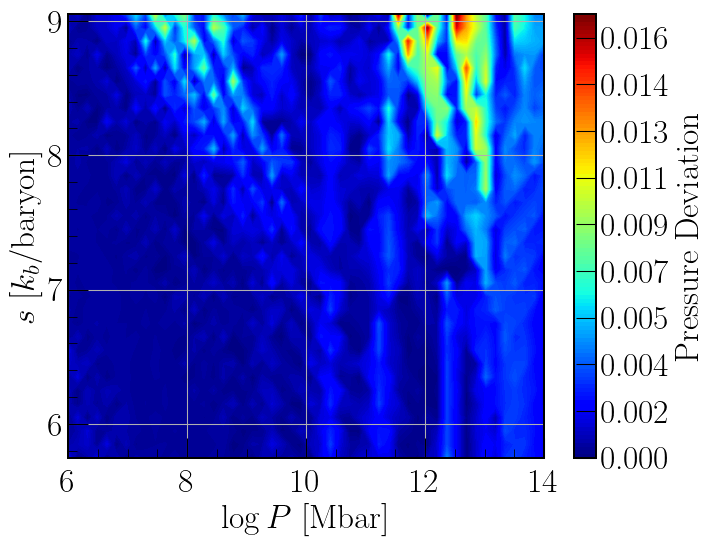

In [6]:
plt.rc_context({'ytick.color':'k'})

X, Y = np.meshgrid(logpvals, svals)
#X, Y = np.meshgrid(pgrid, svals)
cmap_div = 'seismic'#'Spectral'
cmap_poly = 'jet'
cmap_abs = 'tab20c'
#dsdy_rhop_2D = cms_eos.get_dsdy_rhop(X, Y, 0*X+0.27)
fig = plt.figure(figsize=(8,6), dpi=96)
ax = plt.contourf(X, Y, abs(np.array(err_P_res)), 150, vmin=0, vmax=0.017, cmap=cmap_poly)
#cbar = plt.colorbar().set_label('Temperature Fractional Error')
fig.colorbar(ax,format=tick.FormatStrFormatter('%.3f')).set_label('Pressure Deviation')
plt.xlabel(r'$\log{P}$ [Mbar]')
#plt.xlabel(r'$\log{P}$ [Mbar]')
plt.ylabel(r'$s$ [$k_b$/baryon]')
#plt.gca().xaxis.set_major_formatter('{x:9<5.1f}')
plt.minorticks_on()
plt.gca().grid(True)
#plt.gca().
plt.savefig('eos/figs/fig6c.pdf', bbox_inches='tight')
plt.show()

## Recomputing the table.. idk what happened to the last one

In [6]:
s_grid = scvh_eos.s_arr[0][:,0]
logrhogrid = np.linspace(-5, 1.5, 100)
ygrid = scvh_eos.y_arr[:,0][:,0]

t_res = []
p_res = []

for s in tqdm(s_grid):
    t_rho = []
    p_rho = []
    s_val = np.full_like(ygrid, s)
    for rho in logrhogrid:
        logrhoval = np.full_like(ygrid, rho)

        logt = scvh_eos.get_t_srho(s_val, logrhoval, ygrid)
        logp = scvh_eos.get_p_rhot_tab(logrhoval, logt, ygrid)

        t_rho.append(logt)
        p_rho.append(logp)
    
    t_res.append(t_rho)
    p_res.append(p_rho)

100%|██████████| 122/122 [49:24<00:00, 24.30s/it]


In [7]:
np.save('eos/scvh/srho_base_updated.npy', [p_res, t_res])

# Miscibility plots

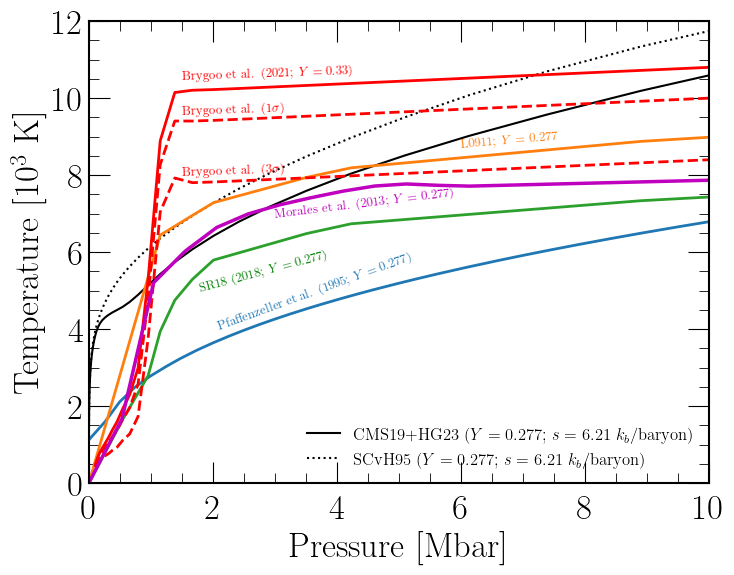

In [18]:
morales = pd.read_csv('misc/morales_pbe_misc.csv', names=['P', 'T'])
mor_interp = interp1d(morales['P'], morales['T'], kind='linear', fill_value='extrapolate')
pgrid1 = np.linspace(morales['P'].min(), 25, 50)

brygoo = pd.read_csv('misc/brygoo_misc.csv')
brygoo['P'] = brygoo['P (GPa)']*0.01
bry_interp = interp1d(brygoo['P'][:-2], brygoo['T (kK)'][:-2], kind='linear', fill_value='extrapolate')
pgrid2 = np.linspace(0.05, 24, 150)

ptest = np.linspace(6, 14, 100)
stest = np.full_like(ptest, 6.21)
ytest = np.full_like(ptest, 0.277)

rho_cms, t_cms = cms_eos.get_rhot_sp_tab(stest, ptest, ytest)
rho_scvh, t_scvh = scvh_eos.get_rhot_sp_tab(stest, ptest, ytest)

pmisc_s1, tmisc_s1 = misc.get_misc_p(ptest, ytest, misc='s', delta_T=0, interp='linear')
#pmisc_s2, tmisc_s2 = misc.get_misc_p(ytest, misc='s', delta_T=0.540)
pmisc_l1, tmisc_l1 = misc.get_misc_p(ptest, ytest, misc='l', delta_T=0, interp='linear')
# pmisc_l2, tmisc_l2 = misc.get_misc_p(ytest, misc='l', delta_T=-0.235)
# pmisc_l3, tmisc_l3 = misc.get_misc_p(ytest, misc='l', delta_T=0.5)
# pmisc_l4, tmisc_l4 = misc.get_misc_p(ytest, misc='l', delta_T=-0.2)
pmisc_b1, tmisc_b1 = misc.get_misc_p(ptest, ytest, delta_T=0, misc='b')
pmisc_b2, tmisc_b2 = misc.get_misc_p(ptest, ytest, bry_sigma=-1, delta_T=0, misc='b')
pmisc_b3, tmisc_b3 = misc.get_misc_p(ptest, ytest, bry_sigma=-3, delta_T=0, misc='b')


pmisc_p1, tmisc_p1 = misc.get_misc_p(ptest, ytest, misc='p', delta_T=0)

fig = plt.figure(figsize=(8, 6))

plt.plot(10**(ptest-12), 10**(t_cms-3), c='k', alpha=1)
plt.plot(10**(ptest-12), 10**(t_scvh-3), c='k', ls='dotted', alpha=1)

plt.plot(pmisc_p1, tmisc_p1, lw=2, label='Pfaffenzeller et al. (1995)')
plt.plot(pmisc_l1, tmisc_l1, lw=2,label='Lorenzen et al. (2009, 2011)')
plt.plot(pmisc_s1, tmisc_s1, lw=2, ls='-', label=' Schottler \& Redmer (2018)')
plt.plot(pmisc_b1, tmisc_b1, lw=2, c='r', ls='-')
plt.plot(pmisc_b2, tmisc_b2, lw=2, c='r', ls='--')#
plt.plot(pmisc_b3, tmisc_b3, lw=2, c='r', ls='--')#
# plt.plot(np.insert(pmisc_s2, 0, 0), np.insert(tmisc_s2, 0, 0), lw=2, c='C2', ls='--', alpha=0.35)
# plt.plot(np.insert(pmisc_l2, 0, 0), np.insert(tmisc_l2, 0, 0), lw=2, c='C1', ls='--', alpha=0.35)
# plt.plot(np.insert(pmisc_l3, 0, 0), np.insert(tmisc_l3, 0, 0), lw=2, c='C1', ls='--', alpha=0.35)
# plt.plot(np.insert(pmisc_l4, 0, 0), np.insert(tmisc_l4, 0, 0), lw=2, c='C1', ls='--', alpha=0.35)

plt.plot(pgrid1, mor_interp(pgrid1), 'm', lw=2.5,label='Morales et al. (2013)')
#plt.plot(brygoo['P'], brygoo['T (kK)'], c='r', lw=2.5, label='Brygoo et al. (2021)')
#plt.plot(pgrid2[pgrid2 > 2], bry_interp(pgrid2[pgrid2 > 2]), c='r', ls='--')

from matplotlib.lines import Line2D
myHandle = [Line2D([], [], linestyle='-', color='k'),
          Line2D([], [], linestyle= 'dotted', color='k')] ##Create custom handles for 2nd legend

l2 = plt.gca().legend(handles=myHandle, labels = ['CMS19+HG23 ($Y = 0.277$; $s = 6.21\ k_b/$baryon)', 'SCvH95 ($Y = 0.277$; $s = 6.21\ k_b/$baryon)'], loc='lower right', frameon=False, prop={'size':12}) ##Add 2nd legend
#plt.gca().add_artist(l1) # 2nd legend will erases the first, so need to add it
plt.xlabel('Pressure [Mbar]')
plt.ylabel('Temperature [10$^3$ K]')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.ylim(0, 12)
plt.xlim(0, 10)

plt.text(1.5, 10.5, 'Brygoo et al. (2021; $Y = 0.33$)', fontsize=9, c='r', rotation=2, rotation_mode='anchor')
plt.text(1.5, 8.0, r'Brygoo et al. ($3\sigma$)', fontsize=9, c='r', rotation=2, rotation_mode='anchor')
plt.text(1.5, 9.6, r'Brygoo et al. ($1\sigma$)', fontsize=9, c='r', rotation=2, rotation_mode='anchor')
plt.text(6.0, 8.7, 'L0911; $Y = 0.277$', fontsize=9, c='C1', rotation=5, rotation_mode='anchor')
#plt.text(7.31, 9.2, '+500 K (Püstow+ 2016)', alpha=0.7, fontsize=10, c='C1', rotation=5, rotation_mode='anchor')
#plt.text(5.4, 7.8, '$-200$ K, $-235$ K (Nettelmann+ 2015, Mankovich+ 2016)', alpha = 0.7, fontsize=10, c='C1', rotation=5, rotation_mode='anchor')
#plt.text(6.2, 7.2, '+540 K (Mankovich+ 2020)', alpha = 0.7, fontsize=10, c='C2', rotation=5, rotation_mode='anchor')
plt.text(3.0, 6.9, 'Morales et al. (2013; $Y = 0.277$)', fontsize=9, c='m', rotation=7, rotation_mode='anchor')
plt.text(1.8, 5.0, r'SR18 (2018; $Y = 0.277$)', fontsize=9, c='g', rotation=15, rotation_mode='anchor')
plt.text(2.1, 4.0, 'Pfaffenzeller et al. (1995; $Y = 0.277$)', fontsize=9, c='C0', rotation=20, rotation_mode='anchor')
#plt.text(2.5, 1.5, '$Y = 0.27$')
#plt.text(2, 3, 'Saturn')
plt.minorticks_on()
#plt.text(0.3, 9.5, 'SCvH95', fontsize=14)
plt.gca().grid(False)

plt.savefig('eos/figs/fig4a_updated.pdf', bbox_inches='tight')
plt.show()

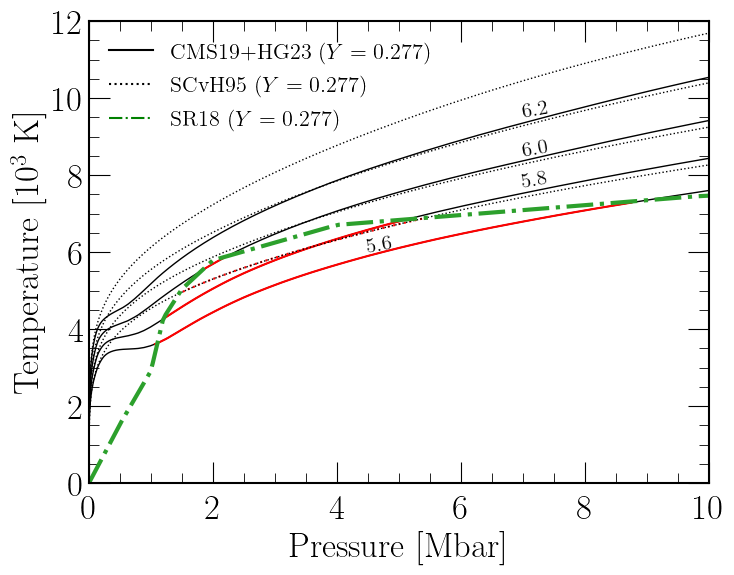

In [20]:
pgrid = np.linspace(6, 14, 500)
yval = np.zeros(500) + 0.277

linstyles = ['dotted','-']
fig = plt.figure(figsize=(8, 6))

pmisc, tmisc = misc.get_misc_p(pgrid, yval, misc='s', delta_T=0)

for s_ in [6.2, 6.0, 5.8, 5.6]:
#for s_ in [6.2]:
    sval = np.zeros(500) + s_
    rho, T = cms_eos.get_rhot_sp_tab(sval, pgrid, yval)
    
    
    
    interp_t = interp1d(10**(pgrid-12), 10**(T-3), kind='linear', fill_value='extrapolate')
    tnew = interp_t(pmisc)

    idx = np.argwhere(np.diff(np.sign(tnew - tmisc))).flatten()
    #print(tnew, tmisc)
    
#     if len(idx) == 0:
#         plt.plot(10**(pgrid-12), 10**(T-3), c='k', alpha=1, lw=1)
#         rho, T = eos.mixture('scvh_main').get_rho_t(yval, sval, pgrid)
#         plt.plot(10**(pgrid-12), 10**(T-3), c='k', ls='dotted', alpha=1, lw=1)
        #continue
        
    if len(idx) == 1:
            p_gap = pgrid[np.where((10**(pgrid-12) >= pmisc[idx[0]]))]
            t_gap = T[np.where((10**(pgrid-12) >= pmisc[idx[0]]))]
            plt.plot(10**(pgrid-12), 10**(T-3), c='k', alpha=1, lw=1)
            plt.plot(10**(p_gap-12), 10**(t_gap-3), 'r-', ls='dotted')
    elif len(idx) == 2:
            p_gap = pgrid[np.where((10**(pgrid-12) >= pmisc[idx[0]]) & (10**(pgrid-12) <= pmisc[idx[1]]))[0]]
            t_gap = T[np.where((10**(pgrid-12) >= pmisc[idx[0]]) & (10**(pgrid-12) <= pmisc[idx[1]]))[0]]
            plt.plot(10**(pgrid-12), 10**(T-3), c='k', alpha=1, lw=1)
            plt.plot(10**(p_gap-12), 10**(t_gap-3), 'r-')
    else: 
        plt.plot(10**(pgrid-12), 10**(T-3), c='k', alpha=1, lw=1)
        
        #plt.plot(10**(p_gap-12), 10**(t_gap-3), 'r--')
    
    
    rho, T = scvh_eos.get_rhot_sp_tab(sval, pgrid, yval)
    
    interp_t = interp1d(10**(pgrid-12), 10**(T-3), kind='linear', fill_value='extrapolate')
    tnew = interp_t(pmisc)

    idx = np.argwhere(np.diff(np.sign(tnew - tmisc))).flatten()
    #print(tnew, tmisc)
        
    if len(idx) == 1:
            p_gap = pgrid[np.where((10**(pgrid-12) >= pmisc[idx[0]]))]
            t_gap = T[np.where((10**(pgrid-12) >= pmisc[idx[0]]))]
            plt.plot(10**(p_gap-12), 10**(t_gap-3), 'r', ls='dotted')
            plt.plot(10**(pgrid-12), 10**(T-3), c='k', ls='dotted', alpha=1, lw=1)
    elif len(idx) == 2:
            p_gap = pgrid[np.where((10**(pgrid-12) >= pmisc[idx[0]]) & (10**(pgrid-12) <= pmisc[idx[1]]))[0]]
            t_gap = T[np.where((10**(pgrid-12) >= pmisc[idx[0]]) & (10**(pgrid-12) <= pmisc[idx[1]]))[0]]
            plt.plot(10**(p_gap-12), 10**(t_gap-3), 'r', ls='dotted')
            plt.plot(10**(pgrid-12), 10**(T-3), c='k', ls='dotted', alpha=1, lw=1)
    else: 
        plt.plot(10**(pgrid-12), 10**(T-3), c='k', ls='dotted', alpha=1, lw=1)
        

plt.plot(np.insert(pmisc, 0, 0), np.insert(tmisc, 0, 0), lw=3, ls='dashdot', c='C2',label=' Schottler \& Redmer (2018)')

from matplotlib.lines import Line2D
myHandle = [Line2D([], [], linestyle='-', color='k'),
          Line2D([], [], linestyle= 'dotted', color='k'),
           Line2D([], [], linestyle= 'dashdot', color='g')] ##Create custom handles for 2nd legend

l2 = plt.gca().legend(handles=myHandle, labels = ['CMS19+HG23 ($Y = 0.277$)', 'SCvH95 ($Y = 0.277$)', 'SR18 ($Y = 0.277$)'], loc='upper left', frameon=False, prop={'size':16}) ##Add 2nd legend
#plt.gca().add_artist(l1) # 2nd legend will erases the first, so need to add it
plt.xlabel('Pressure [Mbar]')
plt.ylabel('Temperature [10$^3$ K]')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.ylim(0, 12)
plt.xlim(0, 10)

#plt.text(2.5, 1.5, '$Y = 0.27$')
plt.text(7.0, 9.5, '6.2', fontsize=15, c='k', rotation=10, rotation_mode='anchor')
plt.text(7.0, 8.5, '6.0', fontsize=15, c='k', rotation=10, rotation_mode='anchor')
plt.text(7.0, 7.7, '5.8', fontsize=15, c='k', rotation=10, rotation_mode='anchor')
plt.text(4.5, 6.0, '5.6', fontsize=15, c='k', rotation=10, rotation_mode='anchor')

plt.minorticks_on()
#plt.text(0.3, 9.5, 'SCvH95', fontsize=14)

#plt.savefig('figures/fig4b.pdf', bbox_inches='tight')
plt.gca().grid(False)
plt.savefig('eos/figs/fig4b_updated.pdf', bbox_inches='tight')
plt.show()

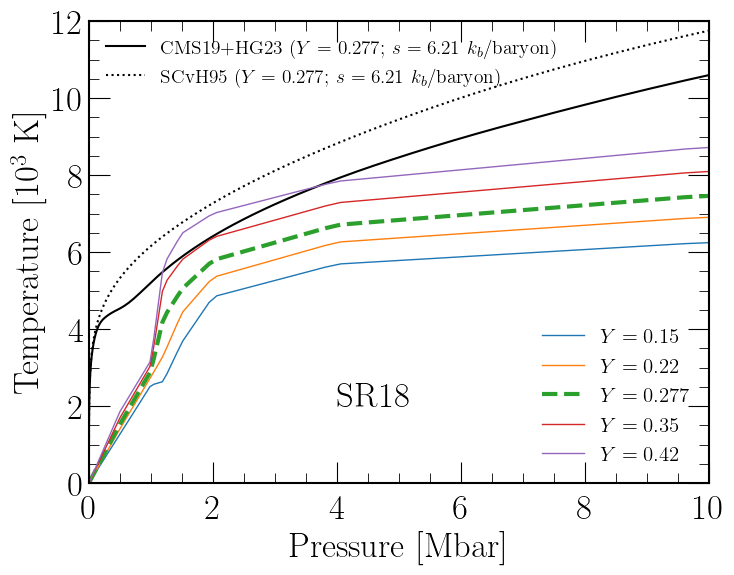

In [22]:
he_massfracs = np.array([0.15, 0.22, 0.277, 0.35, 0.42])
he_nfracs = misc.Y_to_x(he_massfracs)
colors = ['C{}'.format(i) for i, p_ in enumerate(he_massfracs)]
#pgrid = np.arange(0.5, 24, 1)


fig = plt.figure(figsize=(8, 6))

pgrid = np.linspace(6, 14, 300)
yval = np.zeros(300) + 0.277

#linstyles = ['dotted','-']
#fig = plt.figure(figsize=(8, 6))

#colors = ['']
for s_ in [6.21]:
    sval = np.zeros(300) + s_
    rho, T = cms_eos.get_rhot_sp_tab(sval, pgrid, yval)
    plt.plot(10**(pgrid-12), 10**(T-3), c='k', alpha=1)
    rho, T = scvh_eos.get_rhot_sp_tab(sval, pgrid, yval)
    plt.plot(10**(pgrid-12), 10**(T-3), c='k', ls='dotted', alpha=1)

p_grid = np.linspace(0.01, 24, 300)

p_vals = np.arange(0.5, 24, 0.5)

for i, y in enumerate(he_massfracs):
    yval = np.full_like(pgrid, y)
    pmisc, tmisc = misc.get_misc_p(pgrid, yval, misc='s', delta_T=0)
    if i == 2:
        plt.plot(pmisc, tmisc, c=colors[i], lw = 3, ls='--', label=r'$Y = {}$'.format(he_massfracs[i]))
    else:
        plt.plot(pmisc, tmisc, '-', c=colors[i], lw = 1, label=r'$Y = {}$'.format(he_massfracs[i]))
    

plt.legend()

h,l = plt.gca().get_legend_handles_labels() ##Get the legend handles and lables
l1 = plt.gca().legend(frameon=False, prop={'size':15}) ##Plot half as the first legend

from matplotlib.lines import Line2D
myHandle = [Line2D([], [], linestyle='-', color='k'),
          Line2D([], [], linestyle= 'dotted', color='k')] ##Create custom handles for 2nd legend

l2 = plt.gca().legend(handles=myHandle, labels = ['CMS19+HG23 ($Y = 0.277$; $s = 6.21\ k_b/$baryon)', 'SCvH95 ($Y = 0.277$; $s = 6.21\ k_b/$baryon)'], loc='upper left', frameon=False, prop={'size':14}) ##Add 2nd legend
plt.gca().add_artist(l1) # 2nd legend will erases the first, so need to add it
plt.ylabel('Temperature [$10^3$ K]')
plt.xlabel('Pressure [Mbar]')
plt.ylim(0, 12)
#plt.yticks(np.arange(3.0, 7.5, 0.5))
plt.xlim(0,10)
plt.text(4, 2, 'SR18')
# posx = [9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5]
# posy = [5.5, 6, 6.5, 7, 7.1, 8, 8.5]
# color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

# for i, x in enumerate(he_massfracs):
#     plt.text(posx[i], posy[i], '{}'.format(x), c=color[i], fontsize=12)

plt.minorticks_on()
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().grid(False)

plt.savefig('eos/figs/fig3a_updated.pdf', bbox_inches='tight')
plt.show()

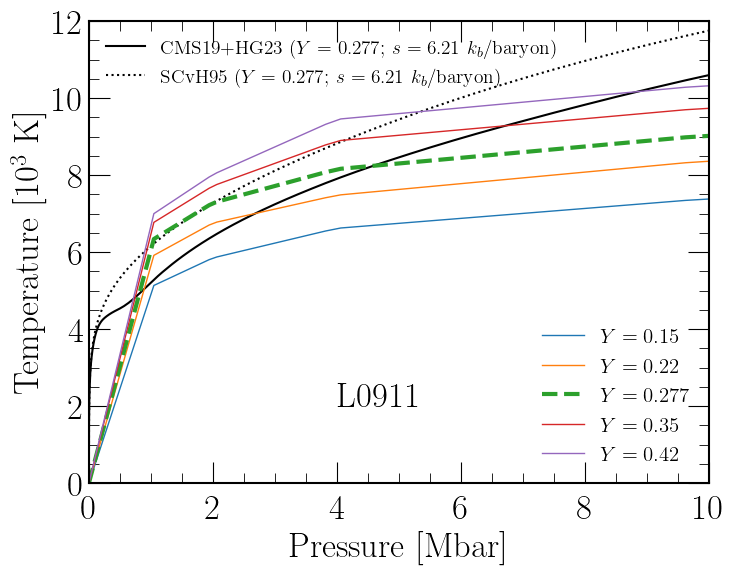

In [23]:
he_massfracs = np.array([0.15, 0.22, 0.277, 0.35, 0.42])
he_nfracs = misc.Y_to_x(he_massfracs)
colors = ['C{}'.format(i) for i, p_ in enumerate(he_massfracs)]
#pgrid = np.arange(0.5, 24, 1)


fig = plt.figure(figsize=(8, 6))

pgrid = np.linspace(6, 14, 300)
yval = np.zeros(300) + 0.277

#linstyles = ['dotted','-']
#fig = plt.figure(figsize=(8, 6))

#colors = ['']
for s_ in [6.21]:
    sval = np.zeros(300) + s_
    rho, T = cms_eos.get_rhot_sp_tab(sval, pgrid, yval)
    plt.plot(10**(pgrid-12), 10**(T-3), c='k', alpha=1)
    rho, T = scvh_eos.get_rhot_sp_tab(sval, pgrid, yval)
    plt.plot(10**(pgrid-12), 10**(T-3), c='k', ls='dotted', alpha=1)

p_grid = np.linspace(0.01, 24, 300)

p_vals = np.arange(0.5, 24, 0.5)

for i, y in enumerate(he_massfracs):
    yval = np.full_like(pgrid, y)
    pmisc, tmisc = misc.get_misc_p(pgrid, yval, misc='l', delta_T=0)
    if i == 2:
        plt.plot(pmisc, tmisc, c=colors[i], lw = 3, ls='--', label=r'$Y = {}$'.format(he_massfracs[i]))
    else:
        plt.plot(pmisc, tmisc, '-', c=colors[i], lw = 1, label=r'$Y = {}$'.format(he_massfracs[i]))
    

plt.legend()

h,l = plt.gca().get_legend_handles_labels() ##Get the legend handles and lables
l1 = plt.gca().legend(frameon=False, prop={'size':15}) ##Plot half as the first legend

from matplotlib.lines import Line2D
myHandle = [Line2D([], [], linestyle='-', color='k'),
          Line2D([], [], linestyle= 'dotted', color='k')] ##Create custom handles for 2nd legend

l2 = plt.gca().legend(handles=myHandle, labels = ['CMS19+HG23 ($Y = 0.277$; $s = 6.21\ k_b/$baryon)', 'SCvH95 ($Y = 0.277$; $s = 6.21\ k_b/$baryon)'], loc='upper left', frameon=False, prop={'size':14}) ##Add 2nd legend
plt.gca().add_artist(l1) # 2nd legend will erases the first, so need to add it
plt.ylabel('Temperature [$10^3$ K]')
plt.xlabel('Pressure [Mbar]')
plt.ylim(0, 12)
#plt.yticks(np.arange(3.0, 7.5, 0.5))
plt.xlim(0,10)
plt.text(4, 2, 'L0911')
# posx = [9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5]
# posy = [5.5, 6, 6.5, 7, 7.1, 8, 8.5]
# color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

# for i, x in enumerate(he_massfracs):
#     plt.text(posx[i], posy[i], '{}'.format(x), c=color[i], fontsize=12)

plt.minorticks_on()
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().grid(False)

plt.savefig('eos/figs/fig3b_updated.pdf', bbox_inches='tight')
plt.show()